In [109]:
# importing libraries yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [110]:
df = pd.read_csv('/content/drive/MyDrive/Dataset IDX/loan_data_2007_2014.csv')
df.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Kemungkinan kolom yang menunjukan performa dari debitur
- loan_status: Menunjukkan status pinjaman saat ini (misalnya, Fully Paid, Charged Off, Current, dll.).
- total_pymnt: Total pembayaran yang telah dilakukan oleh debitur.
- total_rec_late_fee: Total denda keterlambatan yang diterima.
- recoveries: Jumlah uang yang dipulihkan setelah pinjaman gagal bayar.
- collection_recovery_fee: Biaya pemulihan koleksi.
- last_pymnt_d: Tanggal pembayaran terakhir.
- last_pymnt_amnt: Jumlah pembayaran terakhir.

In [112]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti  ...  total_bal_il  il_util  open_rv_12m  \
count  4.662810e+05  466285.000000  ...           0.0      0.0          0.0   
mean   7.327738e+04      17.218758  ...           NaN      NaN          NaN   
std    5.496357e+04       7.851121  ...           NaN      NaN          NaN   
min    1.896000e+03       0.000000  ...           NaN      NaN          NaN   
25%    4.500000e+04      11.360000  ...           NaN      NaN          NaN   
50%    6.300000e+04      16.870000  ...           NaN      NaN          NaN   
75%    8.896000e+04      22.780000  ...           NaN      NaN          NaN   
max    7.500000e+06      39.990000  ...           NaN      NaN          NaN   

       open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
count          0.0         0.0       0.0      3.960090e+05     0.0   
mean           NaN         NaN       NaN      3.037909e+04     NaN   
std            NaN         NaN       NaN      3.724713e+04     NaN   
min            NaN         NaN       NaN      0.000000e+00     NaN   
25%            NaN         NaN       NaN      1.350000e+04     NaN   
50%            NaN         NaN       NaN      2.280000e+04     NaN   
75%            NaN         NaN       NaN      3.790000e+04     NaN   
max            NaN         NaN       NaN      9.999999e+06     NaN   

       total_cu_tl  inq_last_12m  
count          0.0           0.0  
mean           NaN           NaN  
std            NaN           NaN  
min            NaN           NaN  
25%            NaN           NaN  
50%            NaN           NaN  
75%            NaN           NaN  
max            NaN           NaN  

[8 rows x 53 columns]

In [113]:
print(df.isna().sum().to_string())

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

# Feature Selection

- Fitur Unnamed:0, id, member_id,  perlu di drop karena kolom identitas
- fitur desc, title, perlu di drop karena free text
- fitur inq_last_12m, total_cu_tl, inq_fi, all_util, max_bal_bc, open_rv_24m, open_rv_12m, il_util, total_bal_li, mths_since_rcnt_il, open_il_24m, open_il_12m, open_il_6m, open_acc_6m, verification_status_joint, dti_joint, annual_inc_joint, mths_since_last_major_derog, next_pymnt_d, mths_since_last_record, mths_sice_last_delinq perlu di drop karena mengandung banyak sekali missing value

In [114]:
df.drop(columns=['Unnamed: 0', 'id', 'member_id'], inplace=True)

In [115]:
df.drop(columns=['desc', 'title'], inplace=True)

In [116]:
df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

# Exloratory Data Analyst ( EDA )

Fitur Numerical
- loan_amnt: Jumlah pinjaman yang diminta oleh peminjam.
- funded_amnt: Jumlah pinjaman yang disetujui untuk peminjam oleh pemberi pinjaman.
- funded_amnt_inv: Jumlah pinjaman yang sebenarnya diberikan kepada peminjam oleh investor (jika berbeda dengan funded_amnt, ini menunjukkan bahwa pinjaman tersebut didanai oleh investor yang berbeda secara parsial).
- int_rate: Tingkat bunga tahunan untuk pinjaman.
- installment: Pembayaran bulanan yang harus dibayarkan oleh peminjam kepada pemberi pinjaman.
- annual_inc: Pendapatan tahunan peminjam.
- dti: Rasio utang terhadap pendapatan (Debt-to-Income ratio), yang merupakan ukuran kemampuan peminjam untuk mengelola pembayaran utangnya.
- delinq_2yrs: Jumlah keterlambatan pembayaran lebih dari 30 hari dalam 2 tahun terakhir.
- inq_last_6mths: Jumlah pertanyaan (inquiry) kredit dalam 6 bulan terakhir.
- open_acc: Jumlah akun kredit terbuka saat ini peminjam.
- pub_rec: Jumlah catatan publik yang muncul dalam riwayat kredit, seperti kebangkrutan, penarikan, atau gugatan.
- revol_bal: Saldo total yang masih harus dibayar pada semua rekening kredit peminjam.
- revol_util: Tingkat penggunaan total dari seluruh kredit yang tersedia.
- total_acc: Jumlah total akun kredit peminjam, termasuk akun terbuka dan tertutup.
- out_prncp: Jumlah pokok pinjaman yang masih belum dibayar.
- out_prncp_inv: Jumlah pokok pinjaman yang masih belum dibayar oleh investor.
- total_pymnt: Jumlah total yang telah dibayar oleh peminjam sampai saat ini.
- total_pymnt_inv: Jumlah total yang telah dibayar oleh peminjam sampai saat ini kepada investor.
- total_rec_prncp: Total pokok pinjaman yang telah diterima kembali oleh pemberi pinjaman atau investor.
- total_rec_int: Total bunga yang telah diterima kembali oleh pemberi pinjaman atau investor.
- total_rec_late_fee: Total denda keterlambatan yang telah diterima kembali.
- recoveries: Jumlah dana yang dikumpulkan dari peminjam setelah gagal bayar.
- collection_recovery_fee: Biaya pemulihan yang dibebankan kepada peminjam sebagai hasil dari proses pemulihan dana.
- last_pymnt_amnt: Jumlah terakhir yang dibayarkan oleh peminjam sesuai dengan jadwal pembayaran.
- collections_12_mths_ex_med: Jumlah koleksi yang dilaporkan dalam 12 bulan terakhir, tidak termasuk medis.
- policy_code: Kode internal yang digunakan untuk identifikasi produk pinjaman.
- acc_now_delinq: Jumlah akun saat ini yang sedang terlambat dalam pembayaran.
- tot_coll_amt: Jumlah total tagihan yang tertunda untuk pengumpulan.
- tot_cur_bal: Total saldo saat ini untuk semua rekening yang diperlakukan oleh kreditur.
- total_rev_hi_lim: Total batas kredit tinggi untuk semua rekening yang diperlakukan oleh kreditur.

In [118]:
df.describe()

loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  466285.000000  466285.000000    466285.000000  466285.000000   
mean    14317.277577   14291.801044     14222.329888      13.829236   
std      8286.509164    8274.371300      8297.637788       4.357587   
min       500.000000     500.000000         0.000000       5.420000   
25%      8000.000000    8000.000000      8000.000000      10.990000   
50%     12000.000000   12000.000000     12000.000000      13.660000   
75%     20000.000000   20000.000000     19950.000000      16.490000   
max     35000.000000   35000.000000     35000.000000      26.060000   

         installment    annual_inc            dti    delinq_2yrs  \
count  466285.000000  4.662810e+05  466285.000000  466256.000000   
mean      432.061201  7.327738e+04      17.218758       0.284678   
std       243.485550  5.496357e+04       7.851121       0.797365   
min        15.670000  1.896000e+03       0.000000       0.000000   
25%       256.690000  4.500000e+04      11.360000       0.000000   
50%       379.890000  6.300000e+04      16.870000       0.000000   
75%       566.580000  8.896000e+04      22.780000       0.000000   
max      1409.990000  7.500000e+06      39.990000      29.000000   

       inq_last_6mths       open_acc  ...  total_rec_late_fee     recoveries  \
count   466256.000000  466256.000000  ...       466285.000000  466285.000000   
mean         0.804745      11.187069  ...            0.650129      85.344211   
std          1.091598       4.987526  ...            5.265730     552.216084   
min          0.000000       0.000000  ...            0.000000       0.000000   
25%          0.000000       8.000000  ...            0.000000       0.000000   
50%          0.000000      10.000000  ...            0.000000       0.000000   
75%          1.000000      14.000000  ...            0.000000       0.000000   
max         33.000000      84.000000  ...          358.680000   33520.270000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count            466285.000000    466285.000000               466140.000000   
mean                  8.961534      3123.913796                    0.009085   
std                  85.491437      5554.737393                    0.108648   
min                   0.000000         0.000000                    0.000000   
25%                   0.000000       312.620000                    0.000000   
50%                   0.000000       545.960000                    0.000000   
75%                   0.000000      3187.510000                    0.000000   
max                7002.190000     36234.440000                   20.000000   

       policy_code  acc_now_delinq  tot_coll_amt   tot_cur_bal  \
count     466285.0   466256.000000  3.960090e+05  3.960090e+05   
mean           1.0        0.004002  1.919135e+02  1.388017e+05   
std            0.0        0.068637  1.463021e+04  1.521147e+05   
min            1.0        0.000000  0.000000e+00  0.000000e+00   
25%            1.0        0.000000  0.000000e+00  2.861800e+04   
50%            1.0        0.000000  0.000000e+00  8.153900e+04   
75%            1.0        0.000000  0.000000e+00  2.089530e+05   
max            1.0        5.000000  9.152545e+06  8.000078e+06   

       total_rev_hi_lim  
count      3.960090e+05  
mean       3.037909e+04  
std        3.724713e+04  
min        0.000000e+00  
25%        1.350000e+04  
50%        2.280000e+04  
75%        3.790000e+04  
max        9.999999e+06  

[8 rows x 30 columns]

- fitur policy_code hanya mempunyai 1 nilai unique (konstan) perlu di drop

In [119]:
df.drop(columns=['policy_code'],inplace=True)

In [120]:
col_numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

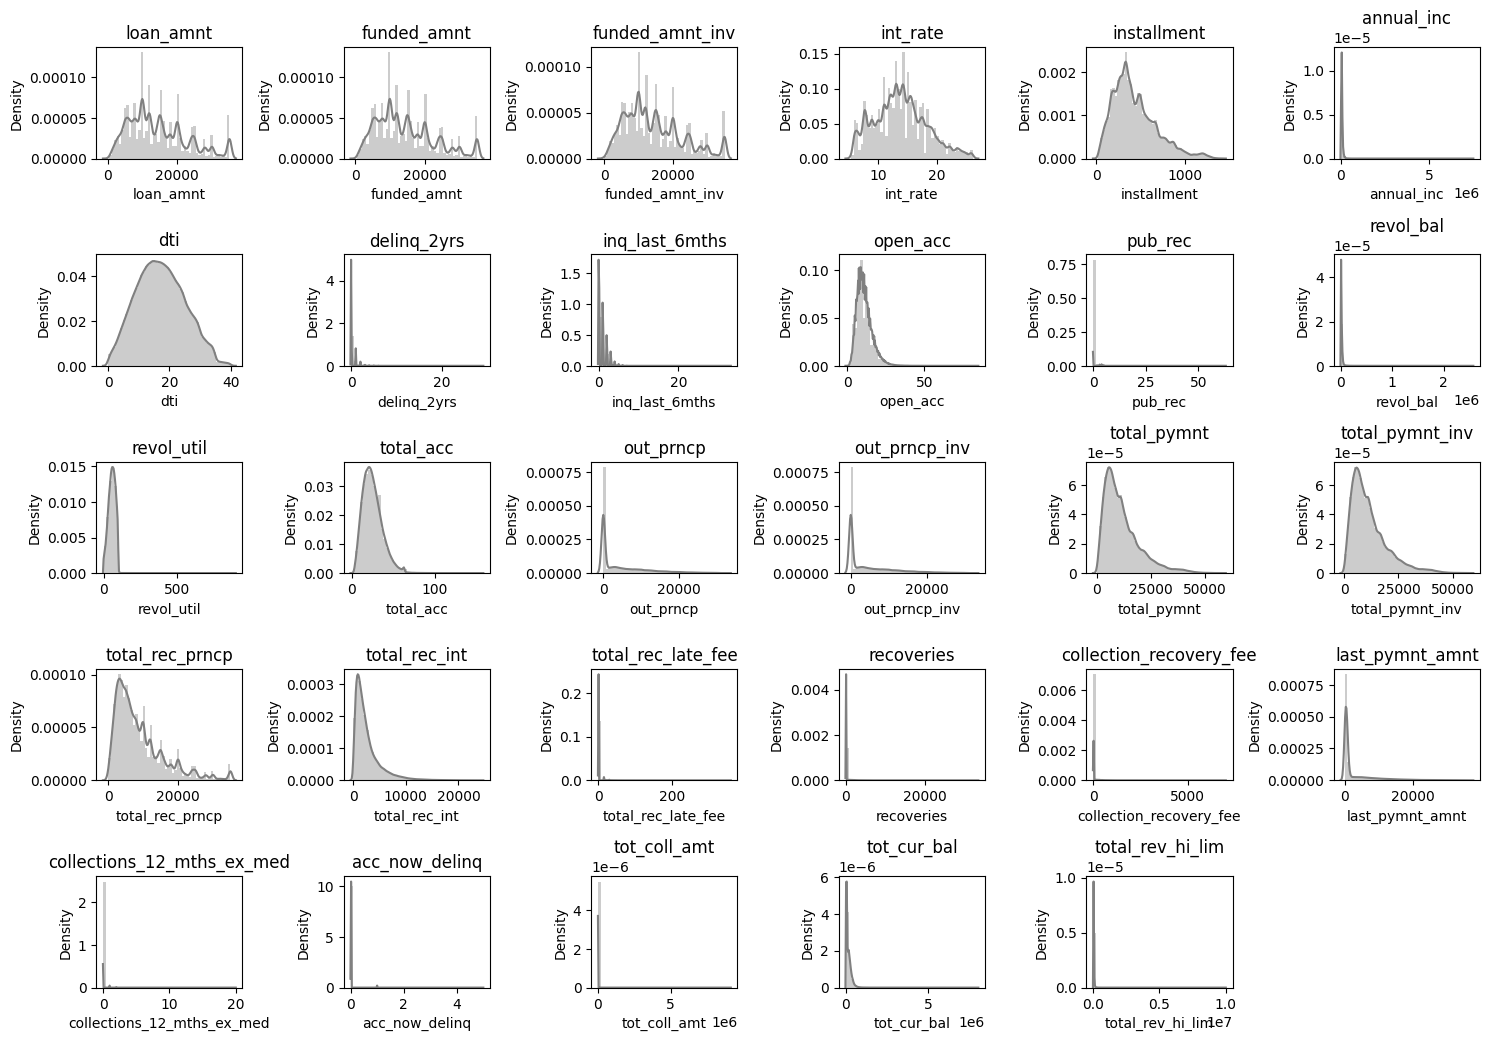

In [121]:
# Buat figure dan axis
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 12))

# Flatten axes array untuk iterasi yang lebih mudah
axes = axes.flatten()

# Loop melalui semua fitur numerik
for i in range(len(col_numeric)):
    sns.distplot(df[col_numeric[i]], color='gray', ax=axes[i])
    axes[i].set_title(col_numeric[i])

# Jika ada subplot yang tidak digunakan, hapus axis
for i in range(len(col_numeric), len(axes)):
    fig.delaxes(axes[i])

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

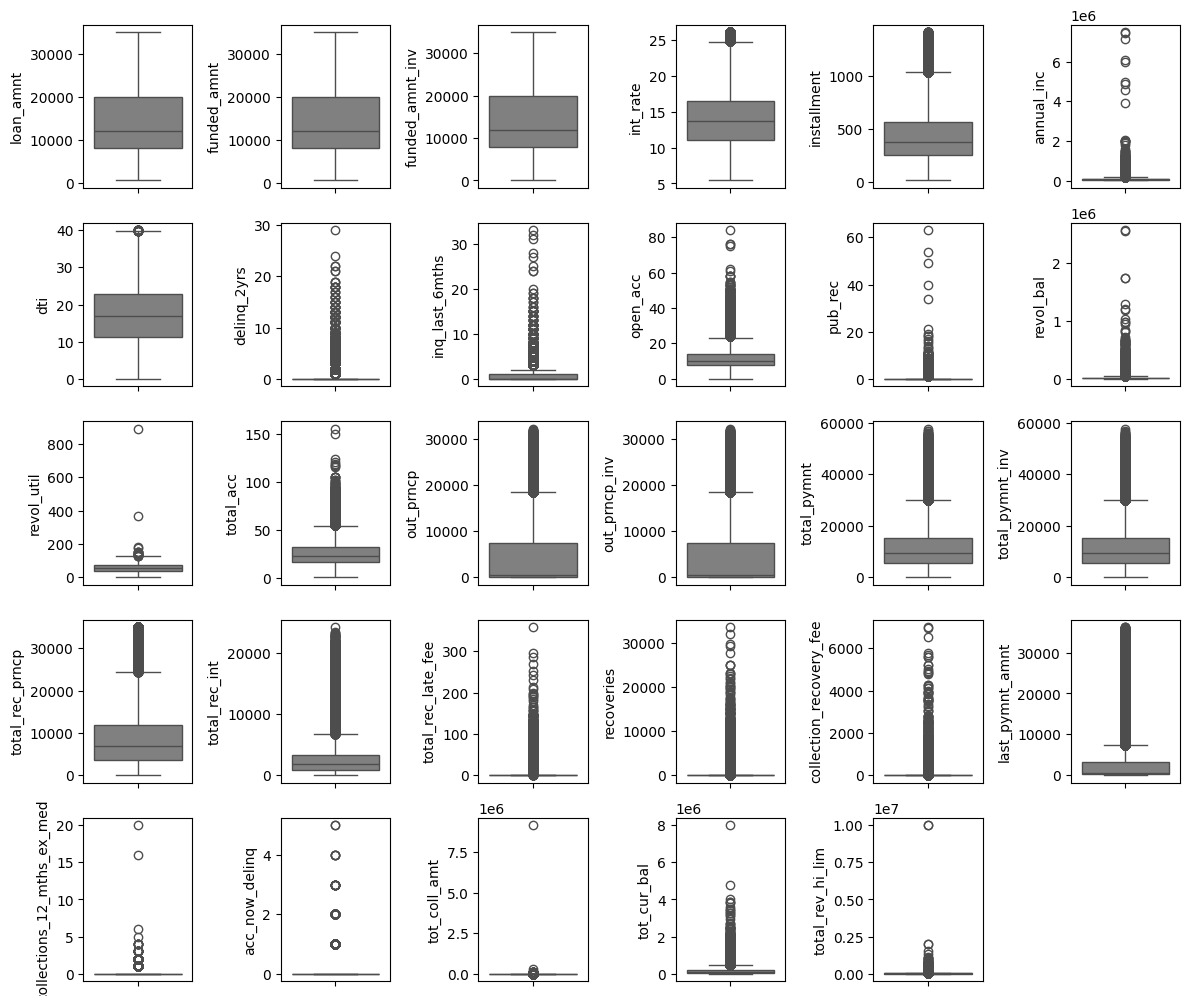

In [122]:
#Cek menggunakan Boxplot
plt.figure(figsize=(12, 12))

# Loop untuk membuat subplot untuk setiap kolom numerik
for i in range(len(col_numeric)):
    plt.subplot(6, 6, i+1)  # Ubah angka 3 dan 2 untuk membuat grid 3 baris x 2 kolom
    sns.boxplot(y=df[col_numeric[i]], color='gray', orient='v')
    plt.tight_layout()

plt.show()

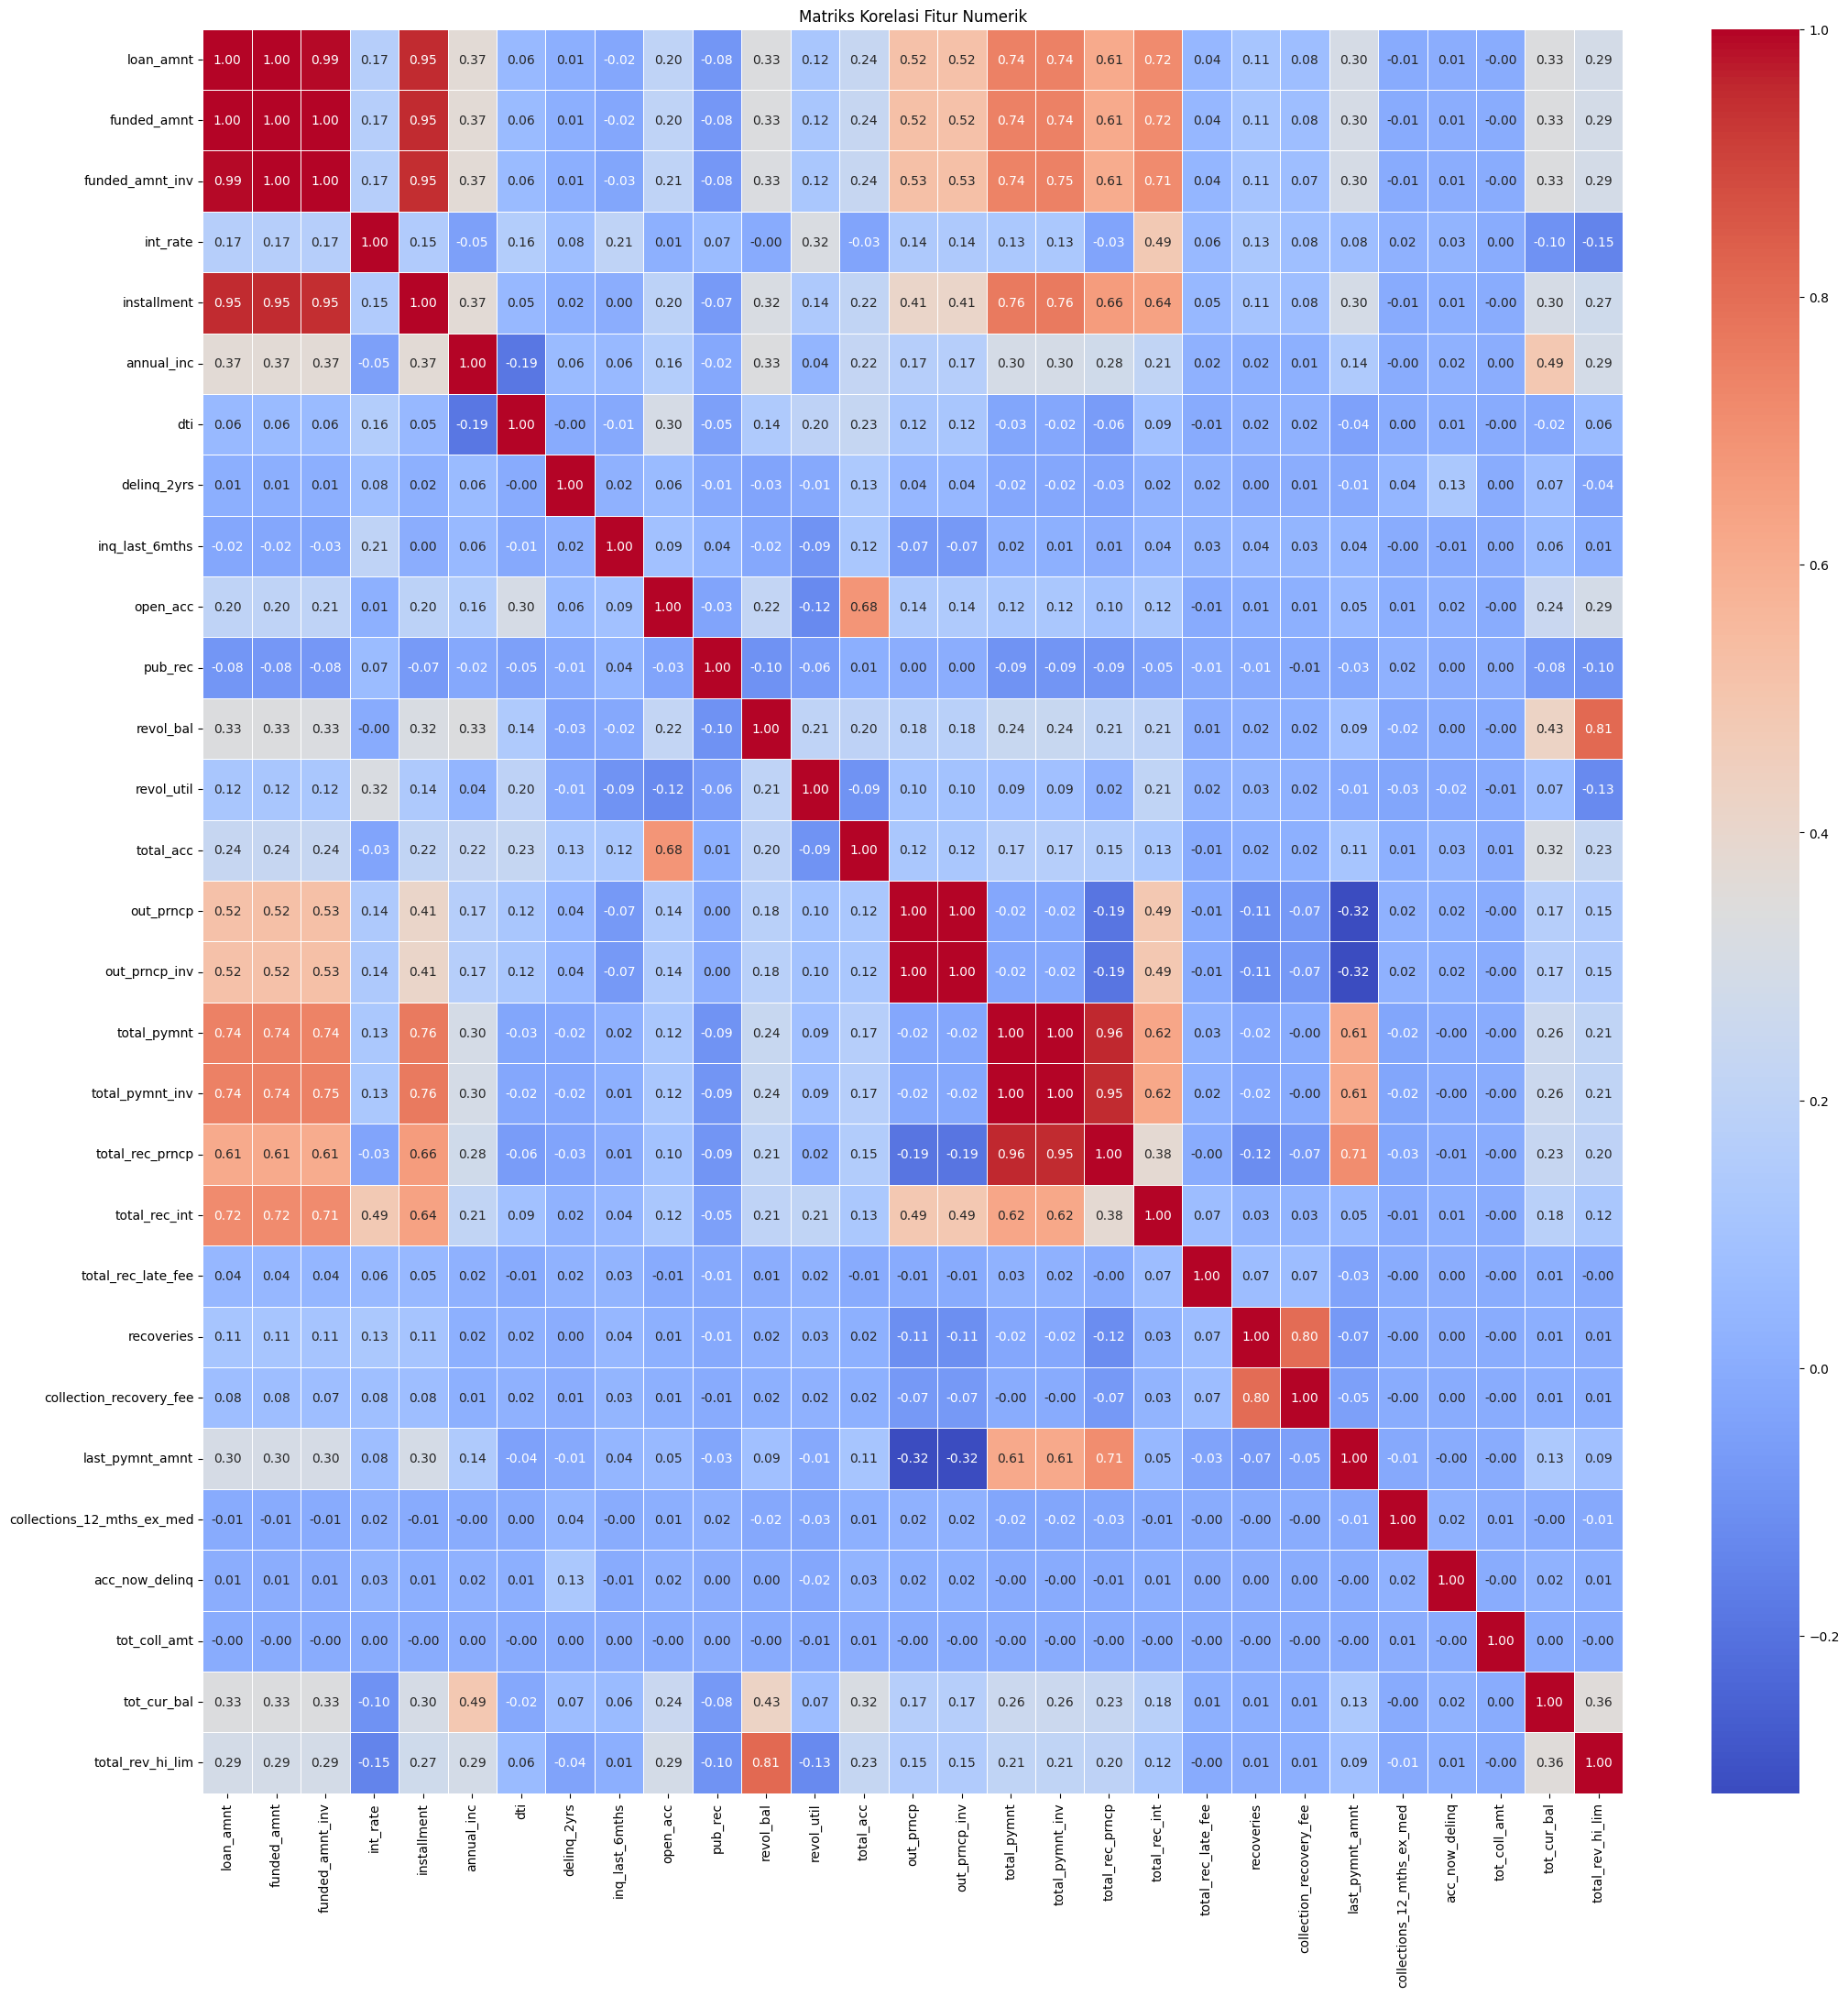

In [123]:
# Menghitung matriks korelasi
correlation_matrix = df[col_numeric].corr()

# Membuat heatmap untuk visualisasi matriks korelasi
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

In [124]:
# Drop fitur yang memiliki korelasi tinggi
df.drop(columns=['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt_inv'], inplace=True)

In [125]:
#Fitur Kategorical
cats = df.select_dtypes(include=['object']).columns.tolist()

- term: Jangka waktu pinjaman, misalnya "36 months" atau "60 months".
- grade: Peringkat kredit yang diberikan oleh pemberi pinjaman, misalnya A, B, C, dll.
- sub_grade: Sub-peringkat kredit yang lebih detail, misalnya A1, A2, ..., B1, B2, dll.
- emp_title: Jabatan atau nama pekerjaan peminjam.
- emp_length: Lamanya masa kerja peminjam dalam tahun.
- home_ownership: Status kepemilikan rumah peminjam, misalnya "OWN", "RENT", atau "MORTGAGE".
- verification_status: Status verifikasi pendapatan peminjam, misalnya "Verified", "Not Verified", atau "Source Verified".
- issue_d: Tanggal pencairan pinjaman.
- loan_status: Status pinjaman, apakah "Fully Paid" (lunas) atau "Charged Off" (gagal bayar).
- pymnt_plan: Apakah peminjam memiliki rencana pembayaran.
- url: URL aplikasi pinjaman.
- purpose: Tujuan dari pinjaman, misalnya "debt_consolidation", "credit_card", atau "home_improvement".
- title: Judul pinjaman yang diberikan oleh peminjam.
- zip_code: Kode pos tempat tinggal peminjam (hanya beberapa digit pertama).
- addr_state: Negara bagian tempat tinggal peminjam.
- earliest_cr_line: Tanggal pembukaan akun kredit pertama peminjam.
- initial_list_status: Status awal pendaftaran pinjaman.
- last_pymnt_d: Tanggal pembayaran terakhir.
- last_credit_pull_d: Tanggal terakhir pengambilan data kredit.
- application_type: Jenis aplikasi pinjaman, misalnya "Individual" atau "Joint".

-



In [126]:
df[cats].describe()

term   grade sub_grade emp_title emp_length home_ownership  \
count       466285  466285    466285    438697     445277         466285   
unique           2       7        35    205475         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        337953  136929     31686      5399     150049         235875   

       verification_status issue_d loan_status pymnt_plan  \
count               466285  466285      466285     466285   
unique                   3      91           9          2   
top               Verified  Oct-14     Current          n   
freq                168055   38782      224226     466276   

                                                      url             purpose  \
count                                              466285              466285   
unique                                             466285                  14   
top     https://www.lendingclub.com/browse/loanDetail....  debt_consolidation   
freq                                                    1              274195   

       zip_code addr_state earliest_cr_line initial_list_status last_pymnt_d  \
count    466285     466285           466256              466285       465909   
unique      888         50              664                   2           98   
top       945xx         CA           Oct-00                   f       Jan-16   
freq       5304      71450             3674              303005       179620   

       last_credit_pull_d application_type  
count              466243           466285  
unique                103                1  
top                Jan-16       INDIVIDUAL  
freq               327699           466285

- fitur sub_grade, url, zip_code, addr_state perlu di drop, karena mempunyai high cardinality
- fitur application_type perlu di drop karena memiliki 1 nilai unique (konstan)
- fitur denga datetime seperti, issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d , perlu dilakukan ekstraksi lebih lanjut.

In [ ]:
df.drop(columns=['zip_code', 'url', 'addr_state', 'application_type', 'sub_grade'], inplace=True)

# Feature Extraxtion

In [129]:
df_fe = df.copy()

In [130]:
#Fitur Kategorical
cats = df_fe.select_dtypes(include=['object']).columns.tolist()

In [131]:
df_fe[cats].describe()

term   grade emp_title emp_length home_ownership  \
count       466285  466285    438697     445277         466285   
unique           2       7    205475         11              6   
top      36 months       B   Teacher  10+ years       MORTGAGE   
freq        337953  136929      5399     150049         235875   

       verification_status issue_d loan_status pymnt_plan             purpose  \
count               466285  466285      466285     466285              466285   
unique                   3      91           9          2                  14   
top               Verified  Oct-14     Current          n  debt_consolidation   
freq                168055   38782      224226     466276              274195   

       earliest_cr_line initial_list_status last_pymnt_d last_credit_pull_d  
count            466256              466285       465909             466243  
unique              664                   2           98                103  
top              Oct-00                   f       Jan-16             Jan-16  
freq               3674              303005       179620             327699

In [132]:
df_fe.drop(columns=['emp_title'], inplace=True)

In [133]:
# Mapping Home Ownership
mapping_home = {
    'MORTGAGE' : 'MORTGAGE',
    'RENT' : 'RENT',
    'OWN' : 'OWN',
    'OTHER' : 'RENT',
    'NONE' : 'RENT',
    'ANY' : 'RENT'
}
df_fe['home_ownership'] = df_fe['home_ownership'].map(mapping_home)

In [134]:
# Mengubah kolom tanggal menjadi datetime
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [135]:
# Memeriksa beberapa baris dari kolom tanggal
print(df_fe[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].head(10))

  issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0  Dec-11           Jan-85       Jan-15             Jan-16
1  Dec-11           Apr-99       Apr-13             Sep-13
2  Dec-11           Nov-01       Jun-14             Jan-16
3  Dec-11           Feb-96       Jan-15             Jan-15
4  Dec-11           Jan-96       Jan-16             Jan-16
5  Dec-11           Nov-04       Jan-15             Sep-15
6  Dec-11           Jul-05       Jan-16             Jan-16
7  Dec-11           Jan-07       Jan-15             Dec-14
8  Dec-11           Apr-04       Apr-12             Aug-12
9  Dec-11           Sep-04       Nov-12             Mar-13


In [136]:
# Mengubah tipe data menjadi datetime
for col in date_columns:
    df_fe[col] = pd.to_datetime(df_fe[col], format='%b-%y', errors='coerce')

In [137]:
# Mengekstraksi tahun dan bulan dari kolom-kolom tersebut
for col in date_columns:
    df_fe[f'{col}_year'] = df_fe[col].dt.year
    df_fe[f'{col}_month'] = df_fe[col].dt.month

In [138]:
# Mengonversi emp_length menjadi nilai numerik
def extract_years(emp_length):
    if pd.isnull(emp_length):
        return None
    elif emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])

df_fe['emp_length'] = df_fe['emp_length'].apply(extract_years)

In [139]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   term                        466285 non-null  object        
 2   int_rate                    466285 non-null  float64       
 3   grade                       466285 non-null  object        
 4   emp_length                  445277 non-null  float64       
 5   home_ownership              466285 non-null  object        
 6   annual_inc                  466281 non-null  float64       
 7   verification_status         466285 non-null  object        
 8   issue_d                     466285 non-null  datetime64[ns]
 9   loan_status                 466285 non-null  object        
 10  pymnt_plan                  466285 non-null  object        
 11  purpose                     466285 non-

- drop fitur datetime yang sudah di ekstraksi

In [140]:
df_fe.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [141]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  445277 non-null  float64
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466281 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  object 
 9   pymnt_plan                  466285 non-null  object 
 10  purpose                     466285 non-null  object 
 11  dti                         466285 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  inq_last_6mths

# GOOD OR BAD

In [154]:
df_fe['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [155]:
# Mengkategorikan debitur sebagai GOOD atau BAD berdasarkan loan_status
def categorize_debtor(status):
    if status in ['Fully Paid', 'Current', 'Does not meet thecredit policy. Status:Fully Paid']:
        return 'GOOD'
    elif status in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']:
        return 'BAD'
    else:
        return None

In [156]:
# Menerapkan fungsi ke kolom loan_status
df_fe['borrowed_status'] = df_fe['loan_status'].apply(categorize_debtor)

In [157]:
# Menampilkan hasil
print(df_fe[['loan_status', 'borrowed_status']].head())

   loan_status borrowed_status
0   Fully Paid            GOOD
1  Charged Off             BAD
2   Fully Paid            GOOD
3   Fully Paid            GOOD
4      Current            GOOD


In [158]:
df_fe['borrowed_status'].value_counts()

borrowed_status
GOOD    408965
BAD      54571
Name: count, dtype: int64

## Bivariate Analysis

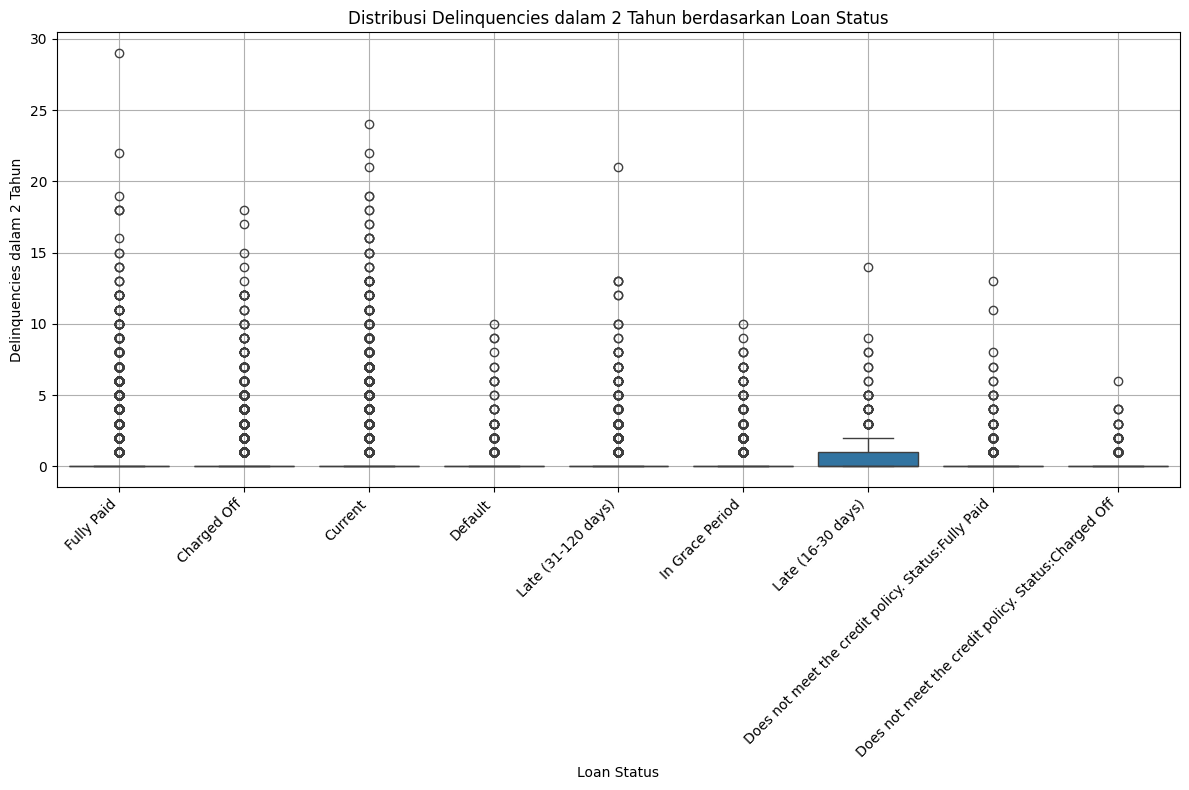

In [146]:
#Melihat hubungan antara Delinnquencies dan Loan_status
# Filter data hanya untuk loan_status yang relevan
relevant_statuses = ['Fully Paid', 'Charged Off', 'Current', 'Default',
                     'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
                     'Does not meet the credit policy. Status:Fully Paid',
                     'Does not meet the credit policy. Status:Charged Off']
filtered_df = df_fe[df_fe['loan_status'].isin(relevant_statuses)]

# Buat box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='delinq_2yrs', data=filtered_df)
plt.title('Distribusi Delinquencies dalam 2 Tahun berdasarkan Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Delinquencies dalam 2 Tahun')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

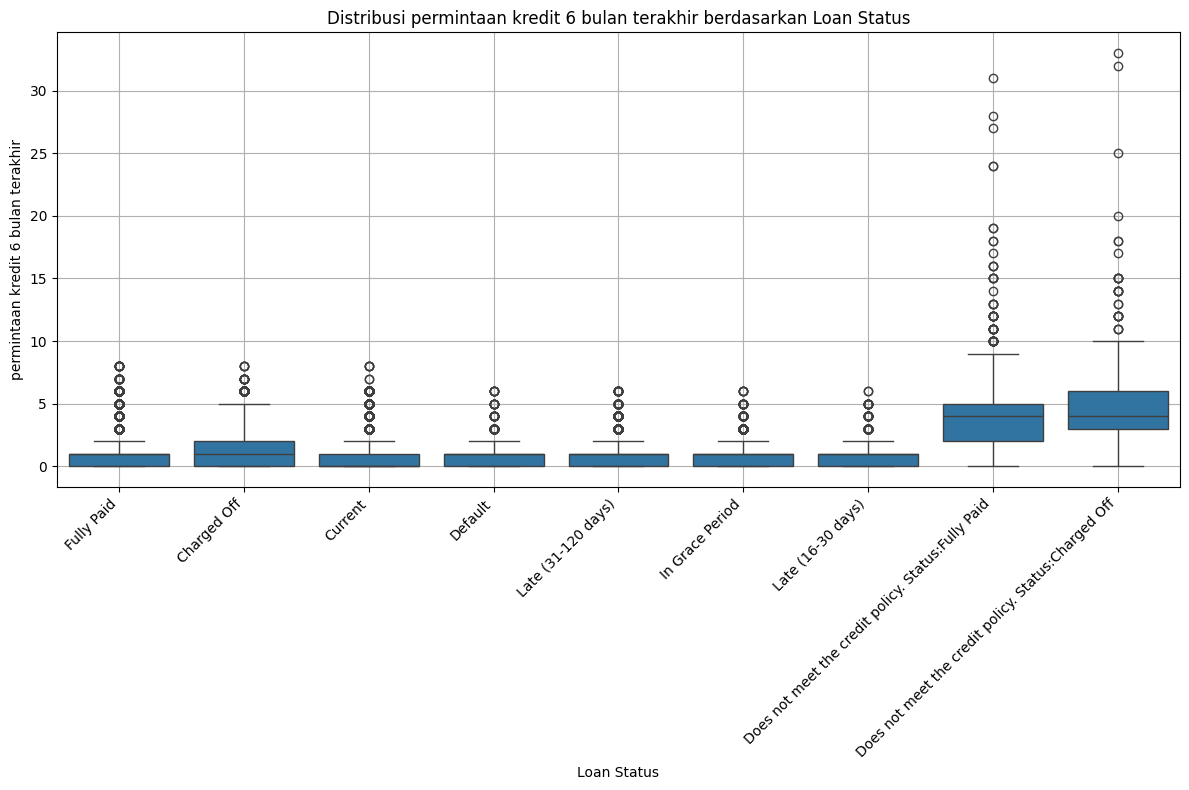

In [147]:
#Melihat hubungan antara permintaan kredit 6 bulan terakhir dan Loan_status
# Filter data hanya untuk loan_status yang relevan
relevant_statuses = ['Fully Paid', 'Charged Off', 'Current', 'Default',
                     'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
                     'Does not meet the credit policy. Status:Fully Paid',
                     'Does not meet the credit policy. Status:Charged Off']
filtered_df = df_fe[df_fe['loan_status'].isin(relevant_statuses)]

# Buat box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='inq_last_6mths', data=filtered_df)
plt.title('Distribusi permintaan kredit 6 bulan terakhir berdasarkan Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('permintaan kredit 6 bulan terakhir')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

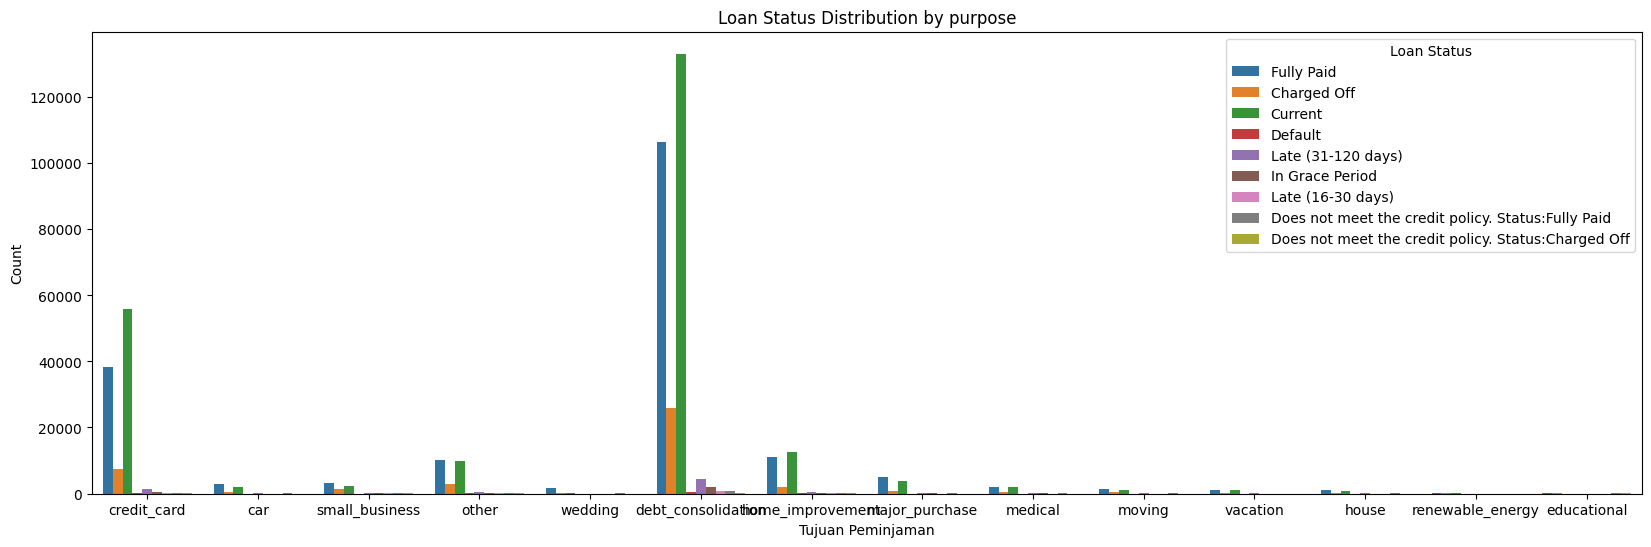

In [160]:
# Menggunakan seaborn untuk membuat plot
plt.figure(figsize=(20, 6))
sns.countplot(data=df_fe, x='purpose', hue='loan_status')
plt.title('Loan Status Distribution by purpose')
plt.xlabel('Tujuan Peminjaman')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

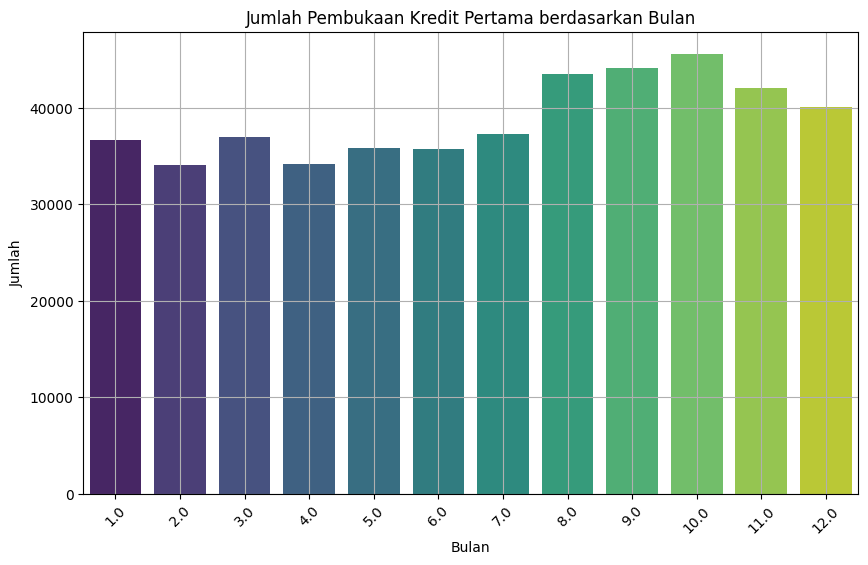

In [161]:
# Membuat countplot untuk earliest_cr_line_month
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fe, x='earliest_cr_line_month', palette='viridis')
plt.title('Jumlah Pembukaan Kredit Pertama berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Bulan Oktober merupakan bulan dengan jumlah pembukaan kredit pertama terbanyak

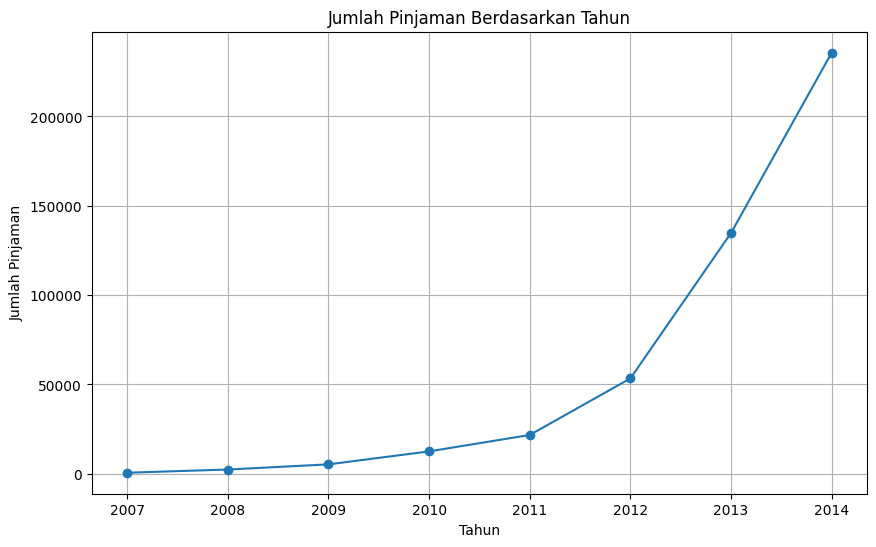

In [162]:
# Menghitung jumlah pinjaman per tahun
loan_counts_per_year = df_fe['issue_d_year'].value_counts().sort_index()

# Membuat line plot untuk jumlah pinjaman per tahun
plt.figure(figsize=(10, 6))
loan_counts_per_year.plot(kind='line', marker='o')
plt.title('Jumlah Pinjaman Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pinjaman')
plt.grid(True)
plt.show()

- Jumlah pinjaman terus mengalami peningkatan-peningkatan dari tahun ke tahun

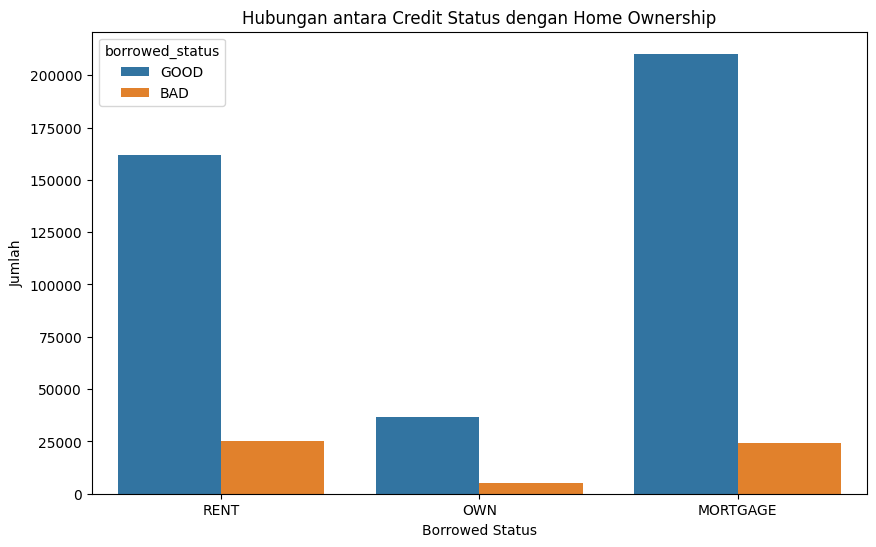

In [163]:
# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fe, x='home_ownership', hue='borrowed_status')
plt.title('Hubungan antara Credit Status dengan Home Ownership')
plt.xlabel('Borrowed Status')
plt.ylabel('Jumlah')
plt.show()

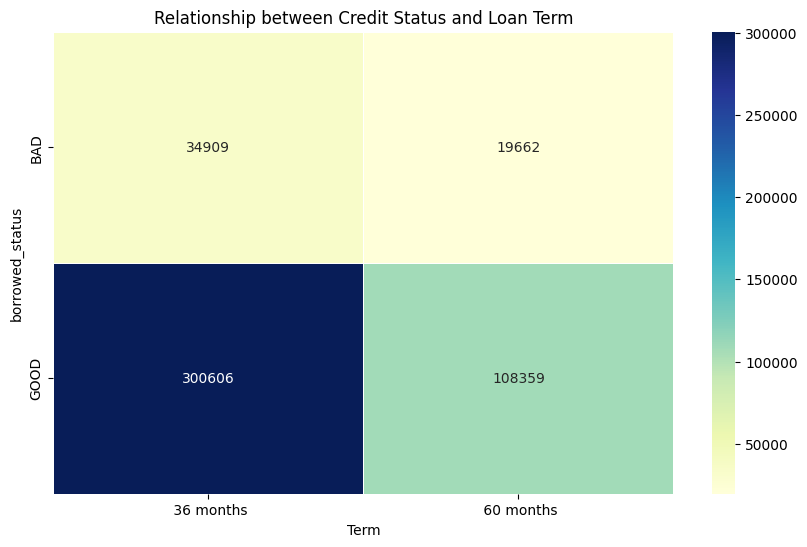

In [165]:
# Menghitung cross-tabulation antara credit_status dan term
cross_tab = pd.crosstab(df_fe['borrowed_status'], df_fe['term'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', cbar=True, linewidths=.5, fmt='d')
plt.title('Relationship between Credit Status and Loan Term')
plt.xlabel('Term')
plt.ylabel('borrowed_status')
plt.show()

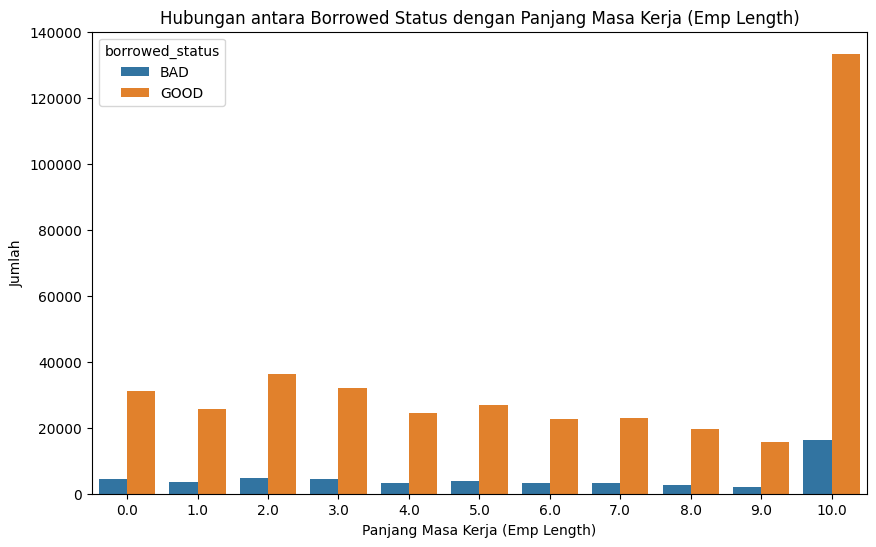

In [166]:
# Credit Status berdasarkan lama bekerja
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fe, x='emp_length', hue='borrowed_status')
plt.title('Hubungan antara Borrowed Status dengan Panjang Masa Kerja (Emp Length)')
plt.xlabel('Panjang Masa Kerja (Emp Length)')
plt.ylabel('Jumlah')
plt.show()

## Handling Missing Value

In [169]:
df_fe.drop(columns=['loan_status'], inplace=True)

In [196]:
df_prep = df_fe.copy()

In [197]:
df_prep.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt             

In [198]:
df_prep.describe()

loan_amnt       int_rate     emp_length    annual_inc  \
count  466285.000000  466285.000000  445277.000000  4.662810e+05   
mean    14317.277577      13.829236       5.993330  7.327738e+04   
std      8286.509164       4.357587       3.627044  5.496357e+04   
min       500.000000       5.420000       0.000000  1.896000e+03   
25%      8000.000000      10.990000       3.000000  4.500000e+04   
50%     12000.000000      13.660000       6.000000  6.300000e+04   
75%     20000.000000      16.490000      10.000000  8.896000e+04   
max     35000.000000      26.060000      10.000000  7.500000e+06   

                 dti    delinq_2yrs  inq_last_6mths       open_acc  \
count  466285.000000  466256.000000   466256.000000  466256.000000   
mean       17.218758       0.284678        0.804745      11.187069   
std         7.851121       0.797365        1.091598       4.987526   
min         0.000000       0.000000        0.000000       0.000000   
25%        11.360000       0.000000        0.000000       8.000000   
50%        16.870000       0.000000        0.000000      10.000000   
75%        22.780000       0.000000        1.000000      14.000000   
max        39.990000      29.000000       33.000000      84.000000   

             pub_rec     revol_bal  ...   tot_cur_bal  total_rev_hi_lim  \
count  466256.000000  4.662850e+05  ...  3.960090e+05      3.960090e+05   
mean        0.160564  1.623020e+04  ...  1.388017e+05      3.037909e+04   
std         0.510863  2.067625e+04  ...  1.521147e+05      3.724713e+04   
min         0.000000  0.000000e+00  ...  0.000000e+00      0.000000e+00   
25%         0.000000  6.413000e+03  ...  2.861800e+04      1.350000e+04   
50%         0.000000  1.176400e+04  ...  8.153900e+04      2.280000e+04   
75%         0.000000  2.033300e+04  ...  2.089530e+05      3.790000e+04   
max        63.000000  2.568995e+06  ...  8.000078e+06      9.999999e+06   

        issue_d_year  issue_d_month  earliest_cr_line_year  \
count  466285.000000  466285.000000          466256.000000   
mean     2013.138330       7.084858            1997.479618   
std         1.176874       3.318001               7.829373   
min      2007.000000       1.000000            1969.000000   
25%      2013.000000       4.000000            1994.000000   
50%      2014.000000       7.000000            1999.000000   
75%      2014.000000      10.000000            2002.000000   
max      2014.000000      12.000000            2068.000000   

       earliest_cr_line_month  last_pymnt_d_year  last_pymnt_d_month  \
count           466256.000000      465909.000000       465909.000000   
mean                 6.762148        2014.958612            5.202286   
std                  3.443762           1.189925            4.378141   
min                  1.000000        2007.000000            1.000000   
25%                  4.000000        2015.000000            1.000000   
50%                  7.000000        2015.000000            4.000000   
75%                 10.000000        2016.000000           10.000000   
max                 12.000000        2016.000000           12.000000   

       last_credit_pull_d_year  last_credit_pull_d_month  
count            466243.000000             466243.000000  
mean               2015.505487                  2.888562  
std                   0.960730                  3.468065  
min                2007.000000                  1.000000  
25%                2015.000000                  1.000000  
50%                2016.000000                  1.000000  
75%                2016.000000                  3.000000  
max                2016.000000                 12.000000  

[8 rows x 34 columns]

- drop baris kolom yang memiliki missing value yang banyak, karena apabila kita melakukan imputasi ditakutkan akan menyebabkan perubahan distribusi

In [199]:
df_prep.dropna(subset=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace=True)

In [200]:
df_prep.dropna(subset=['emp_length'], inplace=True)

In [201]:
df_prep.dropna(subset=['revol_util', 'last_pymnt_d_year', 'last_pymnt_d_month', 'last_credit_pull_d_year', 'last_credit_pull_d_month'], inplace=True)

In [202]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376571 entries, 42535 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   376571 non-null  int64  
 1   term                        376571 non-null  object 
 2   int_rate                    376571 non-null  float64
 3   grade                       376571 non-null  object 
 4   emp_length                  376571 non-null  float64
 5   home_ownership              376571 non-null  object 
 6   annual_inc                  376571 non-null  float64
 7   verification_status         376571 non-null  object 
 8   pymnt_plan                  376571 non-null  object 
 9   purpose                     376571 non-null  object 
 10  dti                         376571 non-null  float64
 11  delinq_2yrs                 376571 non-null  float64
 12  inq_last_6mths              376571 non-null  float64
 13  open_acc       

## Handling Outliers

In [203]:
col_numeric = df_prep.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [204]:
# Handling Outliers menggunakan Z-Score
# Filter Outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df_prep)}')

filtered_entries = np.array([True] * len(df_prep))
for col in col_numeric:
    zscore = np.abs(stats.zscore(df_prep[col]))  # Menghitung absolute Z-score
    filtered_entries = filtered_entries & (zscore < 3)

df_prep = df_prep[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_prep)}')

Jumlah baris sebelum memfilter outlier: 376571
Jumlah baris setelah memfilter outlier: 296184


In [205]:
col_numeric = df_prep.select_dtypes(include=['int64', 'float64']).columns.tolist()

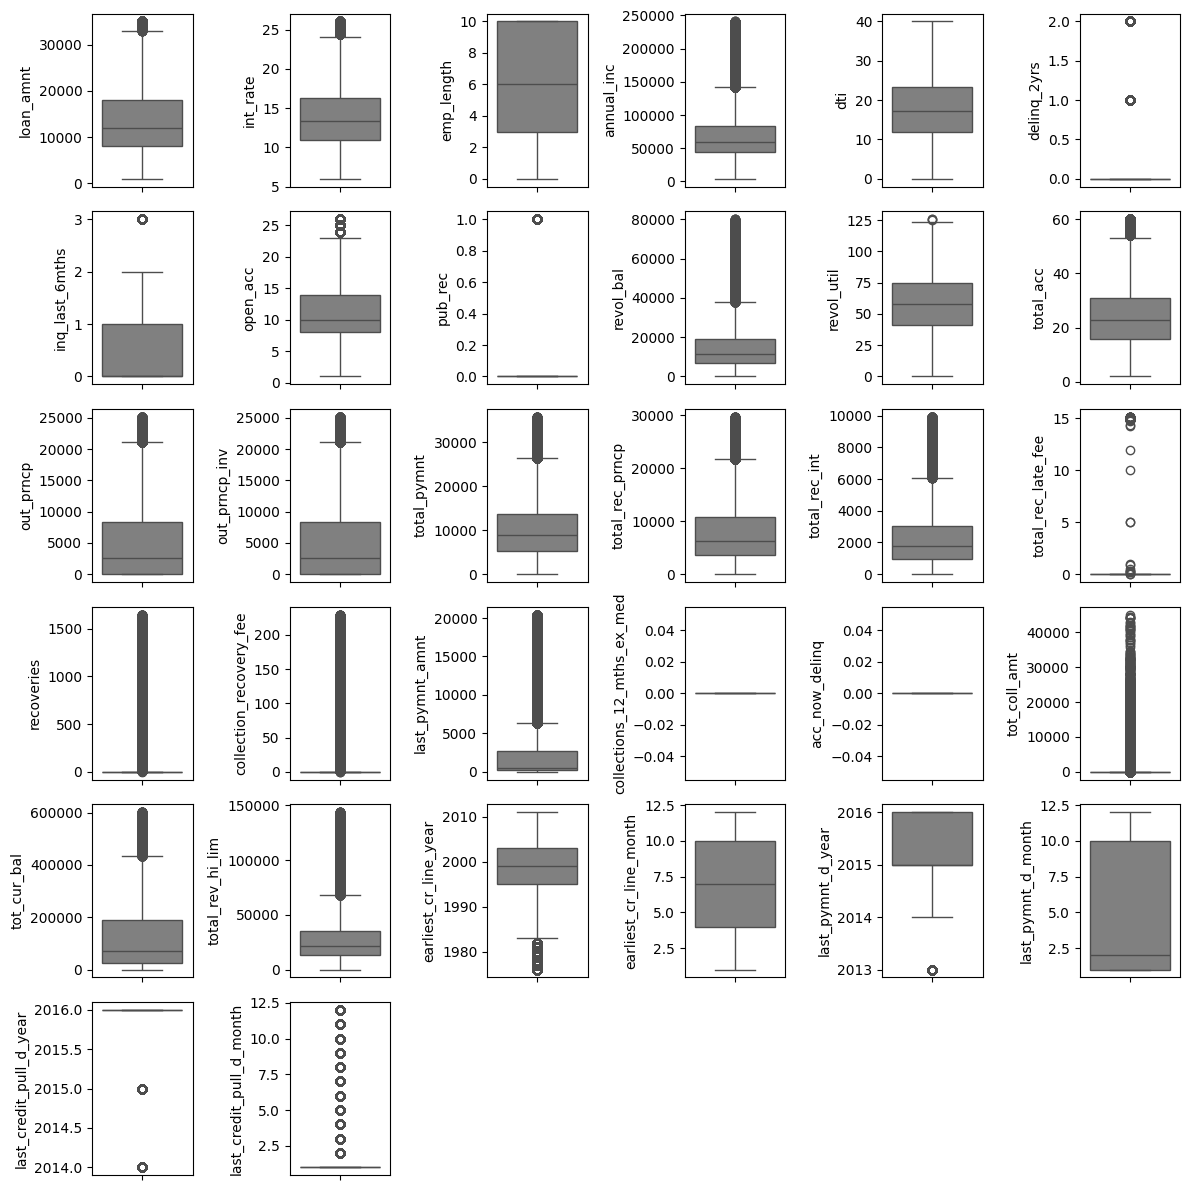

In [206]:
#Cek Outlier menggunakan Boxplot
plt.figure(figsize=(12, 12))

# Loop untuk membuat subplot untuk setiap kolom numerik
for i in range(len(col_numeric)):
    plt.subplot(6, 6, i+1)  # Ubah angka 3 dan 2 untuk membuat grid 3 baris x 2 kolom
    sns.boxplot(y=df_prep[col_numeric[i]], color='gray', orient='v')
    plt.tight_layout()

plt.show()

In [207]:
df_prep.drop(columns=['collections_12_mths_ex_med', 'acc_now_delinq'], inplace=True)

# Feature Encoding

In [208]:
# Ubah fitur term menjadi numerik
# Menghapus kata "months" dan mengonversi ke numerik
df_prep['term'] = df_prep['term'].str.replace(' months', '').astype(int)

In [209]:
#Fitur Kategorical
cats = df_prep.select_dtypes(include=['object']).columns.tolist()

In [210]:
df_prep[cats].describe()

grade home_ownership verification_status pymnt_plan  \
count   296184         296184              296184     296184   
unique       7              3                   3          2   
top          B       MORTGAGE        Not Verified          n   
freq     92777         146097              106227     296181   

                   purpose initial_list_status borrowed_status  
count               296184              296184          296184  
unique                  13                   2               2  
top     debt_consolidation                   f            GOOD  
freq                178606              173066          270005

- Label Encoding untuk fitur grade, pymnt_plan, initial_list_status dan credit_status
- One Hot Encoding untuk home_ownership, verification_status dan purpose

In [211]:
# Label Encoding untuk fitur grade
mapping_grade = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6
}
df_prep['grade'] = df_prep['grade'].map(mapping_grade)

In [212]:
# Label Encoding untuk pymnt_plan
mapping_pp = {
    'n' : 0,
    'y' : 1
}
df_prep['pymnt_plan'] = df_prep['pymnt_plan'].map(mapping_pp)

In [213]:
# Label Encoding untuk initial_list_status
mapping_ils = {
    'f' : 0,
    'w' : 1
}
df_prep['initial_list_status'] = df_prep['initial_list_status'].map(mapping_ils)

In [214]:
# Label Encoding untuk Credit Status
mapping_bs = {
    'BAD' : 0,
    'GOOD' : 1
}
df_prep['borrowed_status'] = df_prep['borrowed_status'].map(mapping_bs)

In [215]:
df_prep['borrowed_status'].value_counts()

borrowed_status
1    270005
0     26179
Name: count, dtype: int64

In [216]:
# One Hot Encoding untuk fitur home_ownership, verification_status, dan purpose
df_prep = pd.get_dummies(df_prep, columns=['home_ownership'])
df_prep = pd.get_dummies(df_prep, columns=['verification_status'])
df_prep = pd.get_dummies(df_prep, columns=['purpose'])

In [217]:
# Mengidentifikasi kolom boolean
boolean_columns = df_prep.select_dtypes(include='bool').columns

# Mengubah tipe data boolean menjadi integer
df_prep[boolean_columns] = df_prep[boolean_columns].astype(int)

In [218]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296184 entries, 42535 to 466284
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            296184 non-null  int64  
 1   term                                 296184 non-null  int64  
 2   int_rate                             296184 non-null  float64
 3   grade                                296184 non-null  int64  
 4   emp_length                           296184 non-null  float64
 5   annual_inc                           296184 non-null  float64
 6   pymnt_plan                           296184 non-null  int64  
 7   dti                                  296184 non-null  float64
 8   delinq_2yrs                          296184 non-null  float64
 9   inq_last_6mths                       296184 non-null  float64
 10  open_acc                             296184 non-null  float64
 11  pub_rec       

In [219]:
df_prep

loan_amnt  term  int_rate  grade  emp_length  annual_inc  pymnt_plan  \
42535       27050    36     10.99      1        10.0     55000.0           0   
42536        9750    36     13.98      2         1.0     26000.0           0   
42537       12000    36      6.62      0        10.0    105000.0           0   
42539       15000    36      8.90      0         2.0     63000.0           0   
42540       12000    36     11.99      1        10.0    130000.0           0   
...           ...   ...       ...    ...         ...         ...         ...   
466278      10000    36     18.25      3        10.0     42000.0           0   
466279      15000    36     13.53      1         4.0     66000.0           0   
466280      18400    60     14.47      2         4.0    110000.0           0   
466282      20700    60     16.99      3         7.0     46000.0           0   
466284      10000    36     19.20      3        10.0     46000.0           0   

          dti  delinq_2yrs  inq_last_6mths  ...  purpose_home_improvement  \
42535   22.87          0.0             0.0  ...                         0   
42536   25.12          0.0             0.0  ...                         0   
42537   14.05          0.0             1.0  ...                         0   
42539   16.51          0.0             0.0  ...                         0   
42540   13.03          0.0             1.0  ...                         0   
...       ...          ...             ...  ...                       ...   
466278  11.57          0.0             0.0  ...                         0   
466279  16.22          0.0             0.0  ...                         0   
466280  19.85          0.0             2.0  ...                         0   
466282  25.65          0.0             2.0  ...                         0   
466284  22.78          1.0             0.0  ...                         0   

        purpose_house  purpose_major_purchase  purpose_medical  \
42535               0                       0                0   
42536               0                       0                0   
42537               0                       0                0   
42539               0                       0                0   
42540               0                       0                0   
...               ...                     ...              ...   
466278              0                       0                0   
466279              0                       0                0   
466280              0                       0                0   
466282              0                       0                0   
466284              0                       0                0   

        purpose_moving  purpose_other  purpose_renewable_energy  \
42535                0              0                         0   
42536                0              0                         0   
42537                0              0                         0   
42539                0              0                         0   
42540                0              0                         0   
...                ...            ...                       ...   
466278               0              0                         0   
466279               0              0                         0   
466280               0              0                         0   
466282               0              0                         0   
466284               0              1                         0   

        purpose_small_business  purpose_vacation  purpose_wedding  
42535                        0                 0                0  
42536                        0                 0                0  
42537                        0                 0                0  
42539                        0                 0                0  
42540                        0                 0                0  
...                        ...               ...              ...  
466278                       0                 1

In [220]:
corr_matrix = df_prep.corr()

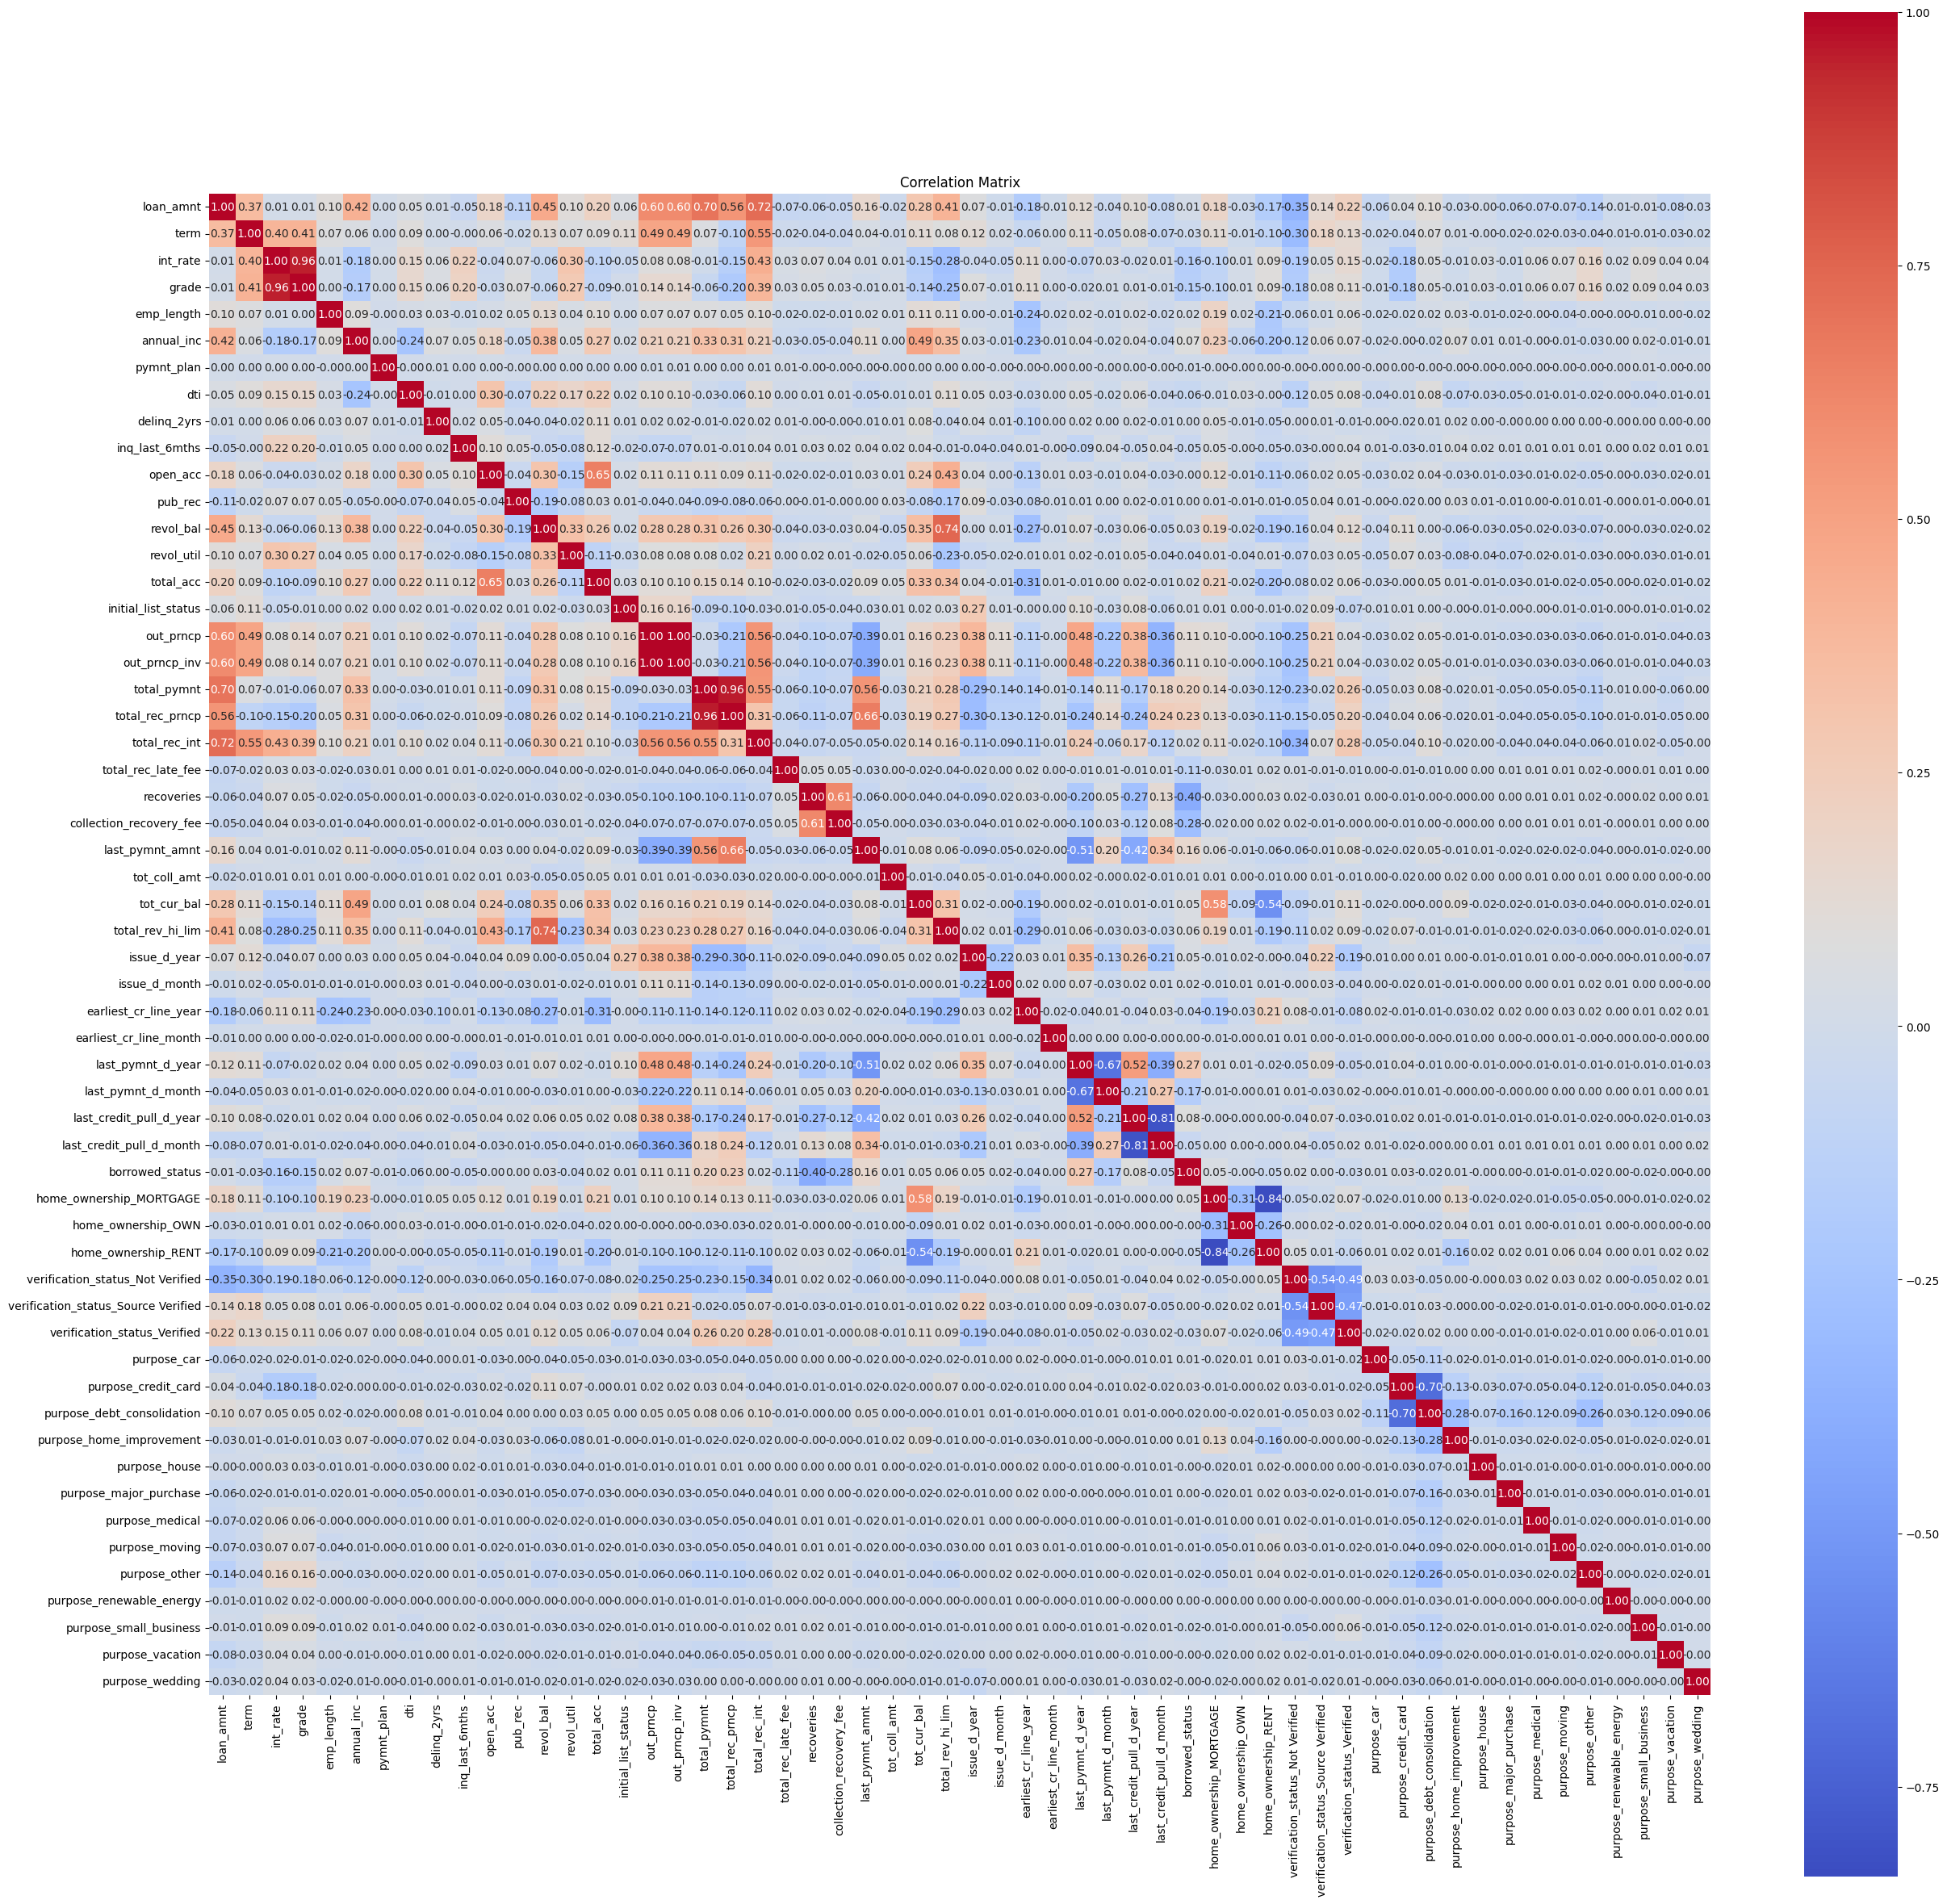

In [221]:
# Menampilkan matriks korelasi menggunakan seaborn heatmap
plt.figure(figsize=(30, 30))  # Ukuran plot disesuaikan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

- Drop fitur yang memiliki korelasi tinggi ( int_rate:, total_pymnt, out_prncp )

In [222]:
df_prep.drop(columns=['int_rate', 'total_pymnt'], inplace=True)

In [223]:
df_prep.drop(columns=['out_prncp'], inplace=True)

In [224]:
df_prep['borrowed_status'] = df_prep.pop('borrowed_status')

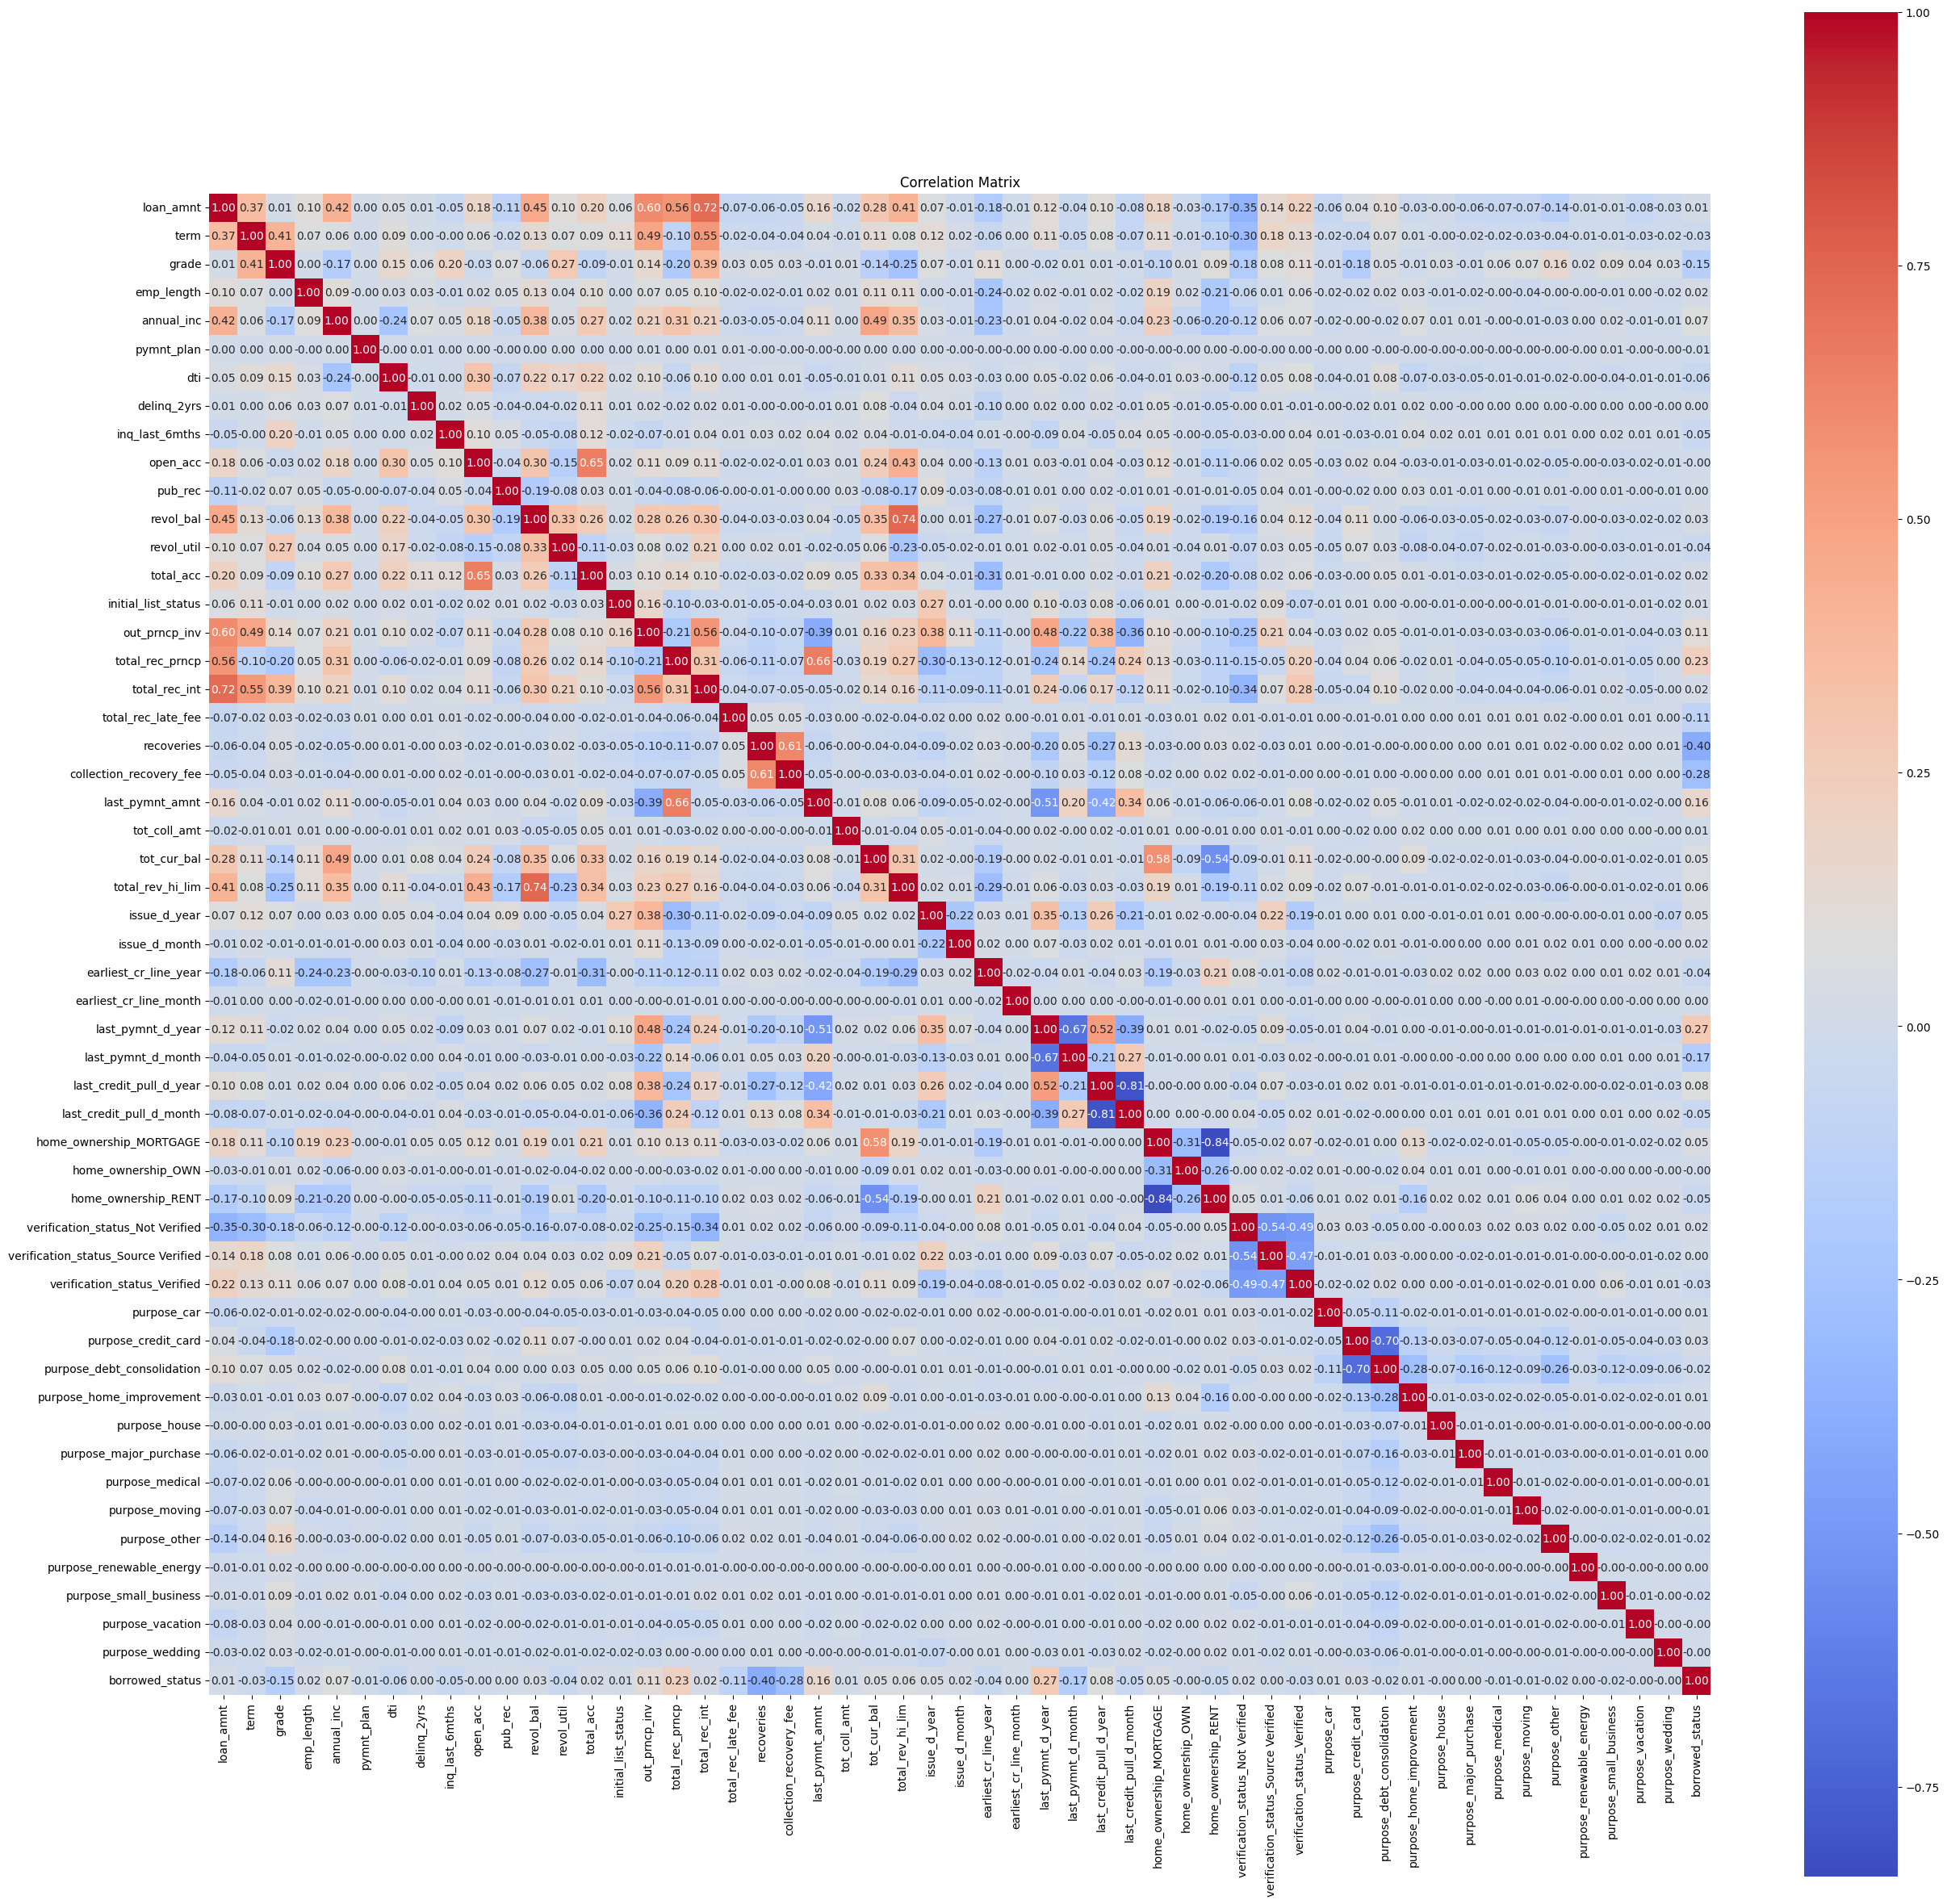

In [225]:
corr_matrix = df_prep.corr()
# Menampilkan matriks korelasi menggunakan seaborn heatmap
plt.figure(figsize=(30, 30))  # Ukuran plot disesuaikan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [226]:
# Identifikasi korelasi tinggi
threshold = 0.9
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]

print("Fitur-fitur dengan korelasi tinggi (di atas 0.9):")
print(high_corr_var)

Fitur-fitur dengan korelasi tinggi (di atas 0.9):
[]


- Dilakukan drop untuk fitur yang memiliki korelasi yang tinggi (<0.9), fitur yang akan di drop yaitu fitur ['loan_amnt', 'funded_amnt_inv', installment, int_grade, out_prncp, total_pymnt, total_rec_prncp]
- dilakukan drop juga untuk salah satu fitur hasil dari One-Hot Encoding, antara hasil pertama atau hasil terakhir


In [227]:
df_prep.drop(columns=['home_ownership_MORTGAGE', 'verification_status_Not Verified', 'purpose_car'], inplace=True)

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Ambil kolom fitur dari df_prep (pastikan tidak termasuk kolom target)
features = df_prep.drop(columns=['borrowed_status'])

# Tambahkan sebuah kolom constant untuk menghitung VIF
features['Intercept'] = 1

# Inisialisasi dataframe untuk menyimpan hasil VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Tampilkan hasil VIF
print(vif_data)

                                Feature           VIF
0                             loan_amnt  1.222410e+01
1                                  term  2.405574e+00
2                                 grade  2.621184e+00
3                            emp_length  1.105965e+00
4                            annual_inc  1.910087e+00
5                            pymnt_plan  1.000477e+00
6                                   dti  1.447179e+00
7                           delinq_2yrs  1.054486e+00
8                        inq_last_6mths  1.135685e+00
9                              open_acc  2.130191e+00
10                              pub_rec  1.121267e+00
11                            revol_bal  5.642377e+00
12                           revol_util  2.708746e+00
13                            total_acc  2.116997e+00
14                  initial_list_status  1.106254e+00
15                        out_prncp_inv  6.986141e+00
16                      total_rec_prncp  1.093387e+01
17                        to

In [247]:
vif_data

Feature           VIF
0                             loan_amnt  1.222410e+01
1                                  term  2.405574e+00
2                                 grade  2.621184e+00
3                            emp_length  1.105965e+00
4                            annual_inc  1.910087e+00
5                            pymnt_plan  1.000477e+00
6                                   dti  1.447179e+00
7                           delinq_2yrs  1.054486e+00
8                        inq_last_6mths  1.135685e+00
9                              open_acc  2.130191e+00
10                              pub_rec  1.121267e+00
11                            revol_bal  5.642377e+00
12                           revol_util  2.708746e+00
13                            total_acc  2.116997e+00
14                  initial_list_status  1.106254e+00
15                        out_prncp_inv  6.986141e+00
16                      total_rec_prncp  1.093387e+01
17                        total_rec_int  7.007425e+00
18                   total_rec_late_fee  1.010458e+00
19                           recoveries  1.931499e+00
20              collection_recovery_fee  1.624152e+00
21                      last_pymnt_amnt  5.052591e+00
22                         tot_coll_amt  1.014208e+00
23                          tot_cur_bal  2.074232e+00
24                     total_rev_hi_lim  5.505292e+00
25                         issue_d_year  3.682166e+00
26                        issue_d_month  1.654626e+00
27                earliest_cr_line_year  1.307468e+00
28               earliest_cr_line_month  1.002479e+00
29                    last_pymnt_d_year  6.615142e+00
30                   last_pymnt_d_month  2.991613e+00
31              last_credit_pull_d_year  4.289718e+00
32             last_credit_pull_d_month  3.428596e+00
33                   home_ownership_OWN  1.182419e+00
34                  home_ownership_RENT  1.773280e+00
35  verification_status_Source Verified  1.513246e+00
36         verification_status_Verified  1.577912e+00
37                  purpose_credit_card  2.241015e+01
38           purpose_debt_consolidation  2.848298e+01
39             purpose_home_improvement  6.468054e+00
40                        purpose_house  1.404503e+00
41               purpose_major_purchase  2.899713e+00
42                      purpose_medical  2.026714e+00
43                       purpose_moving  1.643734e+00
44                        purpose_other  5.912869e+00
45             purpose_renewable_energy  1.059838e+00
46               purpose_small_business  2.029427e+00
47                     purpose_vacation  1.587799e+00
48                      purpose_wedding  1.271348e+00
49                            Intercept  6.381180e+07

- Berdasarkan VIF Checking, terdapat beberapa fitur yang memiliki nilai VIF > 5 yaitu fitur purpose_other, purpose_home_improvement, last_pymnt_d_year, total_rev_hi_lim, total_rec_int, revol_bal

In [230]:
df_prep.drop(columns=['purpose_other', 'purpose_home_improvement', 'last_pymnt_d_year', 'total_rev_hi_lim', 'total_rec_int', 'revol_bal', 'out_prncp_inv'], inplace=True)

In [231]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296184 entries, 42535 to 466284
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            296184 non-null  int64  
 1   term                                 296184 non-null  int64  
 2   grade                                296184 non-null  int64  
 3   emp_length                           296184 non-null  float64
 4   annual_inc                           296184 non-null  float64
 5   pymnt_plan                           296184 non-null  int64  
 6   dti                                  296184 non-null  float64
 7   delinq_2yrs                          296184 non-null  float64
 8   inq_last_6mths                       296184 non-null  float64
 9   open_acc                             296184 non-null  float64
 10  pub_rec                              296184 non-null  float64
 11  revol_util    

# Standarisasi

In [232]:
df_s = df_prep.copy()

In [233]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296184 entries, 42535 to 466284
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            296184 non-null  int64  
 1   term                                 296184 non-null  int64  
 2   grade                                296184 non-null  int64  
 3   emp_length                           296184 non-null  float64
 4   annual_inc                           296184 non-null  float64
 5   pymnt_plan                           296184 non-null  int64  
 6   dti                                  296184 non-null  float64
 7   delinq_2yrs                          296184 non-null  float64
 8   inq_last_6mths                       296184 non-null  float64
 9   open_acc                             296184 non-null  float64
 10  pub_rec                              296184 non-null  float64
 11  revol_util    

In [234]:
# Standarisasi menggunakan StandardScaler
scaler_standard = StandardScaler()

columns_to_scale = ['last_credit_pull_d_month', 'last_credit_pull_d_year', 'last_pymnt_d_month', 'issue_d_month', 'issue_d_year', 'tot_cur_bal', 'tot_coll_amt', 'last_pymnt_amnt', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_prncp', 'initial_list_status', 'total_acc', 'revol_util', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'dti', 'annual_inc', 'emp_length', 'grade', 'term', 'loan_amnt']

In [235]:
# Standarisasi kolom yang dipilih
df_s[columns_to_scale] = scaler_standard.fit_transform(df_s[columns_to_scale])

In [236]:
df_s.head()

loan_amnt      term     grade  emp_length  annual_inc  pymnt_plan  \
42535   1.911984 -0.577184 -0.580127    1.088989   -0.389661           0   
42536  -0.521391 -0.577184  0.228017   -1.398649   -1.274510           0   
42537  -0.204912 -0.577184 -1.388271    1.088989    1.135943           0   
42539   0.217061 -0.577184 -1.388271   -1.122245   -0.145564           0   
42540  -0.204912 -0.577184 -0.580127    1.088989    1.898744           0   

            dti  delinq_2yrs  inq_last_6mths  open_acc  ...  \
42535  0.660313    -0.413403       -0.769626  0.657204  ...   
42536  0.947194    -0.413403       -0.769626  0.212623  ...   
42537 -0.464260    -0.413403        0.386851  0.212623  ...   
42539 -0.150603    -0.413403       -0.769626 -0.676539  ...   
42540 -0.594312    -0.413403        0.386851 -0.454248  ...   

       purpose_debt_consolidation  purpose_house  purpose_major_purchase  \
42535                           1              0                       0   
42536                           1              0                       0   
42537                           1              0                       0   
42539                           1              0                       0   
42540                           1              0                       0   

       purpose_medical  purpose_moving  purpose_renewable_energy  \
42535                0               0                         0   
42536                0               0                         0   
42537                0               0                         0   
42539                0               0                         0   
42540                0               0                         0   

       purpose_small_business  purpose_vacation  purpose_wedding  \
42535                       0                 0                0   
42536                       0                 0                0   
42537                       0                 0                0   
42539                       0                 0                0   
42540                       0                 0                0   

       borrowed_status  
42535                1  
42536                1  
42537                1  
42539                1  
42540                1  

[5 rows x 43 columns]

# Oversampling

In [237]:
df_model = df_s.copy()

In [238]:
X = df_model.drop(columns=['borrowed_status'])
y = df_model['borrowed_status']

In [239]:
# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((207328, 42), (88856, 42), (207328,), (88856,))

In [241]:
# Lakukan oversampling menggunakan SMOTE pada training set
smote = SMOTE(random_state=42)

# Oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [242]:
# Print formatted comparison
print("Data Distribution Before Oversampling:")
print(f"  Total samples: {len(df_model)}")
print(f"  Count (borrowed_status = 0): {y.value_counts()[0]}")
print(f"  Count (borrowed_status = 1): {y.value_counts()[1]}")

print("Data Distribution After Oversampling:")
print(f"  Total samples: {len(X_train_resampled)}")
print(f"  Count (borrowed_status = 0): {y_train_resampled.value_counts()[0]}")
print(f"  Count (borrowed_status = 1): {y_train_resampled.value_counts()[1]}")

Data Distribution Before Oversampling:
  Total samples: 296184
  Count (credit_status = 0): 26179
  Count (credit_status = 1): 270005
Data Distribution After Oversampling:
  Total samples: 377784
  Count (credit_status = 0): 188892
  Count (credit_status = 1): 188892


# Modeling

In [243]:
# evaluasi model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_resampled)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_resampled)

    #Dilakukan tuning F1 dengan menghilangkan perhitungan recall
    print("Accuracy (Test Set): %.4f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.4f" % precision_score(y_test, y_pred))
    print("F1-Score (Test Set): %.4f" % f1_score(y_test, y_pred))
    print("Recall (Test Set): %.4f" % recall_score(y_test, y_pred))
    print("ROC AUC (Train-proba): %.4f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    print("ROC AUC (Test-proba): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    # Cross-validation dengan precision sebagai metrik
    score = cross_validate(model, X_train_resampled, y_train_resampled, cv=10, scoring='precision', return_train_score=True)
    print('Precision (crossval train): '+ str(score['train_score'].mean()))
    print('Precision (crossval test): '+ str(score['test_score'].mean()))


In [244]:
# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
eval_classification(lr)

Accuracy (Test Set): 0.8612
Precision (Test Set): 0.9776
F1-Score (Test Set): 0.9195
Recall (Test Set): 0.8678
ROC AUC (Train-proba): 0.9515
ROC AUC (Test-proba): 0.9199
Precision (crossval train): 0.8923538449283036
Precision (crossval test): 0.8933649418104537


In [245]:
# DecisionTree
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=None, criterion='gini', random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
eval_classification(dt)

Accuracy (Test Set): 0.9761
Precision (Test Set): 0.9831
F1-Score (Test Set): 0.9870
Recall (Test Set): 0.9909
ROC AUC (Train-proba): 0.9925
ROC AUC (Test-proba): 0.9679
Precision (crossval train): 0.9658197751584883
Precision (crossval test): 0.9661701802844374


# Confusion Matrix

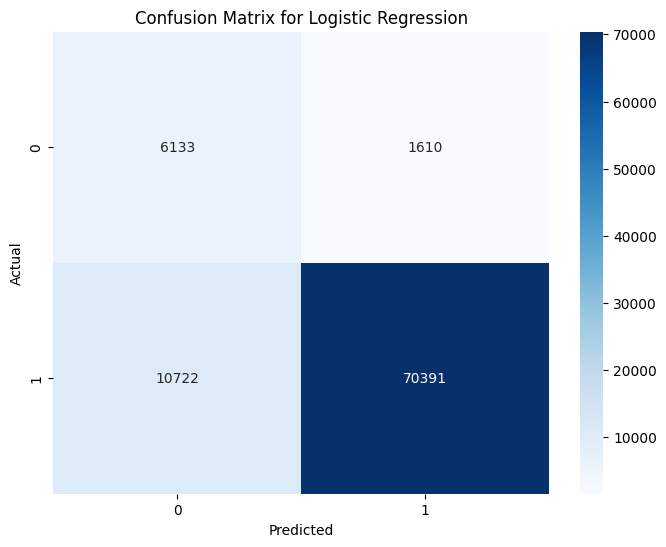

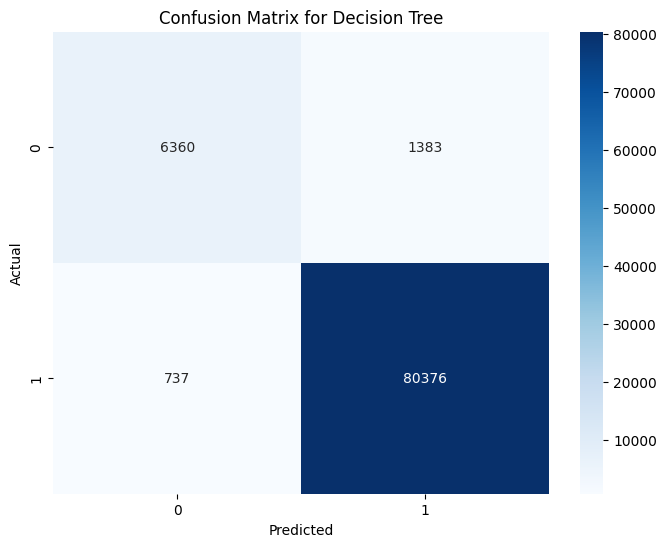

In [246]:

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluasi dan plot confusion matrix untuk Logistic Regression
plot_confusion_matrix(y_test, lr.predict(X_test), "Logistic Regression")

# Evaluasi dan plot confusion matrix untuk Decision Tree
plot_confusion_matrix(y_test, dt.predict(X_test), "Decision Tree")